### **■ 유통 판매량 예측 및 재고 최적화**
# **단계 1: 데이터 탐색**

<img src = "https://github.com/Jangrae/img/blob/master/store.png?raw=true" width=800, align="left"/>


# **⏰ 수행 과제**

다음과 같은 과정으로 프로젝트를 진행합니다.

#### **1. 환경 설정**
- 이후 진행에 필요한 환경 설정을 수행합니다.


#### **2. 데이터 탐색**
- 대상 데이터에 대해 충분히 탐색합니다.
- 특히 시계열 패턴을 찾기 위한 다양한 시각화를 수행합니다.
- 탐색 결과를 기반으로 이후에 새로운 변수를 추가하게 됩니다.


#### **📢 예측해야 할 핵심 상품 역할 분담**
- 핵심 상품별로 데이터를 탐색하고 가설을 수립해야 합니다.
- 2인당 핵심 상품 하나씩 분담하여 과제를 수행합니다.
- 팀 미팅을 통해 진행 사항을 공유하고 내용을 취합해 정리합니다.


#### **📢 대상 상품(핵심 상품)**

| Product_ID|Product_Code|SubCategory|Category|LeadTime|Price|
|----|----|----|----|----|----|
|3|DB001|Beverage|Drink|2|8|
|12|GA001|Milk|Food|2|6|
|42|FM001|Agricultural products|Grocery|2|5|

# **1. 환경 설정**

- 이후 진행에 필요한 환경 설정을 수행합니다.

## **(1) 경로 설정**

- 프로젝트 수행 환경에 맞게 파일 경로를 설정합니다.

### **1) 로컬 수행(Anaconda)**
- project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [216]:
# 기본 경로

# path = ''

### **2) 구글 콜랩 수행**

- 구글 콜랩을 사용중이면 구글 드라이브를 연결합니다.

In [217]:
# 구글 드라이브 연결, 패스 지정
# import sys
# if 'google.colab' in sys.modules:
#     from google.colab import drive
#     drive.mount('/content/drive')
#     path = '/content/drive/MyDrive/project/'

## **(2) 라이브러리 불러오기**

- 이후 사용할 기본 라이브러리를 불러옵니다.

In [218]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

## **(3) 데이터 불러오기**

- 이후 분석 대상이 되는 파일을 불러오고 기본 정보를 확인합니다.

### **1) 데이터 불러오기**

- 분석 대상인 학습용 데이터를 불러옵니다.
- 데이터프레임 이름은 다음과 같이 통일합니다.
    - sales: 판매 정보
    - orders: 고객 방문수
    - oil_price: 휘발유 가격
    - stores: 매장 정보
    - products: 상품 정보
- 날짜 데이터를 갖는 Date 변수는 이후 편의를 위해 datetime 형으로 변환합니다.

In [219]:
# 데이터 불러오기
sales = pd.read_csv('sales_train.csv')
orders = pd.read_csv('orders_train.csv')
oil_price = pd.read_csv('oil_price_train.csv')
stores = pd.read_csv('stores.csv')
products = pd.read_csv('products.csv')

In [220]:
# datetime 형으로 변환
sales['Date'] = pd.to_datetime(sales['Date'] )
oil_price['Date'] = pd.to_datetime(oil_price['Date'] )
orders['Date'] = pd.to_datetime(orders['Date'] )

### **2) 기본 정보 확인**

- 각 데이터의 기본 정보를 확인합니다.
- Date 변수가 있는 데이터의 날짜 범위(최솟값, 최댓값)를 확인합니다.

In [221]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934275 entries, 0 to 934274
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Date        934275 non-null  datetime64[ns]
 1   Store_ID    934275 non-null  int64         
 2   Qty         934275 non-null  float64       
 3   Product_ID  934275 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 28.5 MB


In [222]:
oil_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       825 non-null    datetime64[ns]
 1   WTI_Price  795 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.0 KB


In [223]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57558 entries, 0 to 57557
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           57558 non-null  datetime64[ns]
 1   Store_ID       57558 non-null  int64         
 2   CustomerCount  57558 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.3 MB


In [224]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Store_ID    54 non-null     int64 
 1   City        54 non-null     object
 2   State       54 non-null     object
 3   Store_Type  54 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.8+ KB


In [225]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_ID    16 non-null     int64 
 1   Product_Code  16 non-null     object
 2   SubCategory   16 non-null     object
 3   Category      16 non-null     object
 4   LeadTime      16 non-null     int64 
 5   Price         16 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 896.0+ bytes


In [226]:
sales.describe()

,Store_ID,Qty,Product_ID
count,934275.000000,934275.000000,934275.000000
mean,27.520398,654.136862,17.164075
std,15.586942,1495.231047,10.370486
min,1.000000,0.000000,3.000000
25%,14.000000,10.000000,8.000000
50%,28.000000,88.000000,15.000000
75%,41.000000,562.000000,27.000000
max,54.000000,124717.000000,42.000000


In [227]:
oil_price.describe()

,WTI_Price
count,795.000000
mean,61.279082
std,23.803058
min,26.190000
25%,44.950000
50%,50.720000
75%,82.805000
max,107.950000


In [228]:
orders.describe()

,Store_ID,CustomerCount
count,57558.000000,57558.000000
mean,27.021509,1692.776921
std,15.598785,970.936760
min,1.000000,5.000000
25%,13.000000,1038.000000
50%,27.000000,1390.000000
75%,40.000000,2071.000000
max,54.000000,8359.000000


In [229]:
stores.describe()

,Store_ID,Store_Type
count,54.000000,54.000000
mean,27.500000,3.000000
std,15.732133,1.213136
min,1.000000,1.000000
25%,14.250000,2.000000
50%,27.500000,3.000000
75%,40.750000,4.000000
max,54.000000,5.000000


In [230]:
products.describe()

,Product_ID,LeadTime,Price
count,16.000000,16.000000,16.000000
mean,18.687500,2.125000,26.437500
std,12.064929,0.341565,35.784482
min,3.000000,2.000000,4.000000
25%,9.500000,2.000000,6.000000
50%,15.500000,2.000000,16.000000
75%,27.500000,2.000000,30.250000
max,42.000000,3.000000,150.000000


In [231]:
# LeadTime 3삭제
# products = products[ products['LeadTime']!=3 ]

# **2. 데이터 탐색**

- 대상 데이터에 대해 충분히 탐색합니다.
- 특히 시계열 패턴을 찾기 위한 다양한 시각화를 수행합니다.
- 탐색 결과를 기반으로 이후에 새로운 변수를 추가하게 됩니다.

## **(1) 기본 데이터 탐색**

- 개별 데이터에 대한 충분한 탐색을 수행합니다.
- 다음과 같은 탐색이 포함될 수 있습니다.
    - 각 데이터 결측치 존재 여부 확인
    - 각 데이터에 포함된 범줏값 비율 확인
    - 각 데이터에 포함된 연속값 범위와 분포 확인
    - 기타 등등...

### **1) 결측치 확인**

- 데이터로 결측치 존재 여부를 확인합니다.

In [232]:
files = ['sales', 'products', 'orders', 'stores', 'oil_price']
for f in files:
    print('=' * 20)
    print(f)
    print('-' * 20)
    print(eval(f'{f}.isna().sum()')) #!  문자열을 파이썬 코드로 해석하고 그 결과를 반환

sales
--------------------
Date          0
Store_ID      0
Qty           0
Product_ID    0
dtype: int64
products
--------------------
Product_ID      0
Product_Code    0
SubCategory     0
Category        0
LeadTime        0
Price           0
dtype: int64
orders
--------------------
Date             0
Store_ID         0
CustomerCount    0
dtype: int64
stores
--------------------
Store_ID      0
City          0
State         0
Store_Type    0
dtype: int64
oil_price
--------------------
Date          0
WTI_Price    30
dtype: int64


In [233]:
print(sales.isnull().sum())
print('-'*50)
print(orders.isnull().sum())
print('-'*50)
print(oil_price.isnull().sum())
print('-'*50)
print(stores.isnull().sum())
print('-'*50)
print(products.isnull().sum())


Date          0
Store_ID      0
Qty           0
Product_ID    0
dtype: int64
--------------------------------------------------
Date             0
Store_ID         0
CustomerCount    0
dtype: int64
--------------------------------------------------
Date          0
WTI_Price    30
dtype: int64
--------------------------------------------------
Store_ID      0
City          0
State         0
Store_Type    0
dtype: int64
--------------------------------------------------
Product_ID      0
Product_Code    0
SubCategory     0
Category        0
LeadTime        0
Price           0
dtype: int64


### **2) 범줏값 비율 확인**

- 중요 범줏값의 비율을 확인합니다.

In [234]:
# sales / 날짜 +지점ID + 상품ID + 판매량
print(sales['Date'].min(), '~', sales['Date'].max())
print('-'*50)
print(sales['Date'].dt.year.value_counts().sort_index())

2014-01-01 00:00:00 ~ 2017-02-28 00:00:00
--------------------------------------------------
2014    295205
2015    295205
2016    296016
2017     47849
Name: Date, dtype: int64


In [235]:
# orders / 날짜 + 지점ID + 고객수
print(orders['Date'].min(), '~', orders['Date'].max())
print('-'*50)
print(orders['Date'].dt.year.value_counts().sort_index())

2014-01-01 00:00:00 ~ 2017-02-28 00:00:00
--------------------------------------------------
2014    17138
2015    18346
2016    18999
2017     3075
Name: Date, dtype: int64


In [236]:
# oil_price / 날짜 + 유가
print(oil_price['Date'].min(), '~', oil_price['Date'].max())
print('-'*50)
print(oil_price['Date'].dt.year.value_counts().sort_index())

2014-01-01 00:00:00 ~ 2017-02-28 00:00:00
--------------------------------------------------
2014    261
2015    261
2016    261
2017     42
Name: Date, dtype: int64


In [237]:
# stores / 주 + 도시 + 가게ID + Store_type 
stores[['City']].value_counts(normalize=True)*100

City         
Saint Paul       33.333333
Raleigh          14.814815
Atlanta           5.555556
Oklahoma City     5.555556
LA                3.703704
Sacramento        3.703704
Richmond          3.703704
Phoenix           3.703704
Annapolis         3.703704
Nashville         1.851852
Olympia           1.851852
Albany            1.851852
Minneapolis       1.851852
Indianapolis      1.851852
Harrisburg        1.851852
Columbus          1.851852
Charlotte         1.851852
Boston            1.851852
Bloomington       1.851852
Asheville         1.851852
Wilmington        1.851852
dtype: float64

In [238]:
stores[['State']].value_counts(normalize=True)*100

State           
\tMinnesota         35.185185
\tNorth Carolina    20.370370
\tCalifornia         7.407407
Georgia              5.555556
Oklahoma             5.555556
Arizona              3.703704
Indiana              3.703704
Maryland             3.703704
Virginia             3.703704
\tTennessee          1.851852
Massachusetts        1.851852
New York             1.851852
Ohio                 1.851852
Pennsylvania         1.851852
Washington           1.851852
dtype: float64

In [239]:
# products / 상품ID + 코드 + 카테고리 + sub 카테고리 + Lead Time + 가격
products[['Product_Code']].value_counts(normalize=True)*100

Product_Code
FM001           12.50
DA001            6.25
DB001            6.25
FB001            6.25
FF001            6.25
FP001            6.25
GA001            6.25
GE001            6.25
GM001            6.25
GS001            6.25
HC001            6.25
HG001            6.25
HH001            6.25
HK001            6.25
HK002            6.25
dtype: float64

In [240]:
products[['Category']].value_counts(normalize=True)*100

Category       
Food               31.25
Household Goods    31.25
Grocery            25.00
Drink              12.50
dtype: float64

In [241]:
products[['SubCategory']].value_counts(normalize=True)*100

SubCategory          
Kitchen                  12.50
Agricultural products     6.25
BAKERY                    6.25
Beverage                  6.25
Cleaning                  6.25
EGGS                      6.25
Frozen                    6.25
Gardening Tools           6.25
Home Appliances           6.25
Meats                     6.25
Milk                      6.25
Prepared                  6.25
Seafood                   6.25
Wine                      6.25
Yogurt                    6.25
dtype: float64

In [242]:
# sales # 답참고 추가 
sales['Product_ID'].value_counts()

3     62208
5     62208
7     62208
8     62208
10    62208
11    62208
12    62208
15    62208
16    62208
20    62208
38    62208
24    62208
27    62208
29    62208
32    62208
42     1155
Name: Product_ID, dtype: int64

## **(2) 판매량, 고객 방문수**

- 시각화를 통해 상품별 판매량, 고객 방문수 등을 월별로 살펴봅니다.
- 대상 매장(44), 대상 상품(3, 12, 42)에 대해서 살펴봅니다.
- 다음과 같은 시각화가 포함될 수 있습니다.
    - 3년간(2014년~2016년)상품별 월별 판매량
    - 2016년 상품별 월별 판매량
    - 3년간(2014년~2016년) 월별 고객 방문수
    - 2016년 월별 고객 방문수
    - 기타 등등...

### **1) 상품별 월별 판매 수량**

- 주요 상품의 월별 판매량을 확인합니다.

- 3년간(2014년 ~ 2016년) 월별 판매량을 확인합니다.

In [243]:
### 여기서부터 정한 상품으로 진행 : 
# Product_ID	Product_Code	     SubCategory	      Category	 LeadTime	Price
#    42	           FM001	    Agricultural products      Grocery	    2	     5

In [244]:
products[ products['Category']=='Grocery' ]

,Product_ID,Product_Code,SubCategory,Category,LeadTime,Price
4,32,GS001,Seafood,Grocery,3,34
8,10,GE001,EGGS,Grocery,2,5
9,24,GM001,Meats,Grocery,3,17
15,42,FM001,Agricultural products,Grocery,2,5


In [245]:
# sales_grocery = sales[ (sales['Product_ID']==42) | (sales['Product_ID']==32) | (sales['Product_ID']==10) | (sales['Product_ID']==24) ] # Grocery 중 product id 전부일때
sales_grocery = sales[ (sales['Product_ID']==42) & (sales['Store_ID']==44) ]
sales_grocery

,Date,Store_ID,Qty,Product_ID
658,2014-01-01,44,51.0,42
1469,2014-01-02,44,76.0,42
2280,2014-01-03,44,74.0,42
3091,2014-01-04,44,78.0,42
3902,2014-01-05,44,88.0,42
...,...,...,...,...
930878,2017-02-24,44,91.0,42
931689,2017-02-25,44,105.0,42
932500,2017-02-26,44,108.0,42
933311,2017-02-27,44,78.0,42


In [246]:
# 연도와 월을 추출
sales_grocery['year'] = sales_grocery['Date'].dt.year
sales_grocery['month'] = sales_grocery['Date'].dt.month

# 2014년부터 2016년까지의 데이터 선택
sales_2014_2016 = sales_grocery[(sales_grocery['year'] >= 2014) & (sales_grocery['year'] <= 2016)]

# 연도와 월을 기준으로 그룹화하고 판매량 합계 계산
monthly_sales_2014_2016 = sales_2014_2016.groupby(['year', 'month'], as_index=False)[['Qty']].sum() 
# 수정 #! as_index=False

monthly_sales_2014_2016.head()
# monthly_sales_2014_2016 = monthly_sales_2014_2016.astype(int) # 전


,year,month,Qty
0,2014,1,2251.0
1,2014,2,2308.0
2,2014,3,3106.0
3,2014,4,3386.0
4,2014,5,3772.0


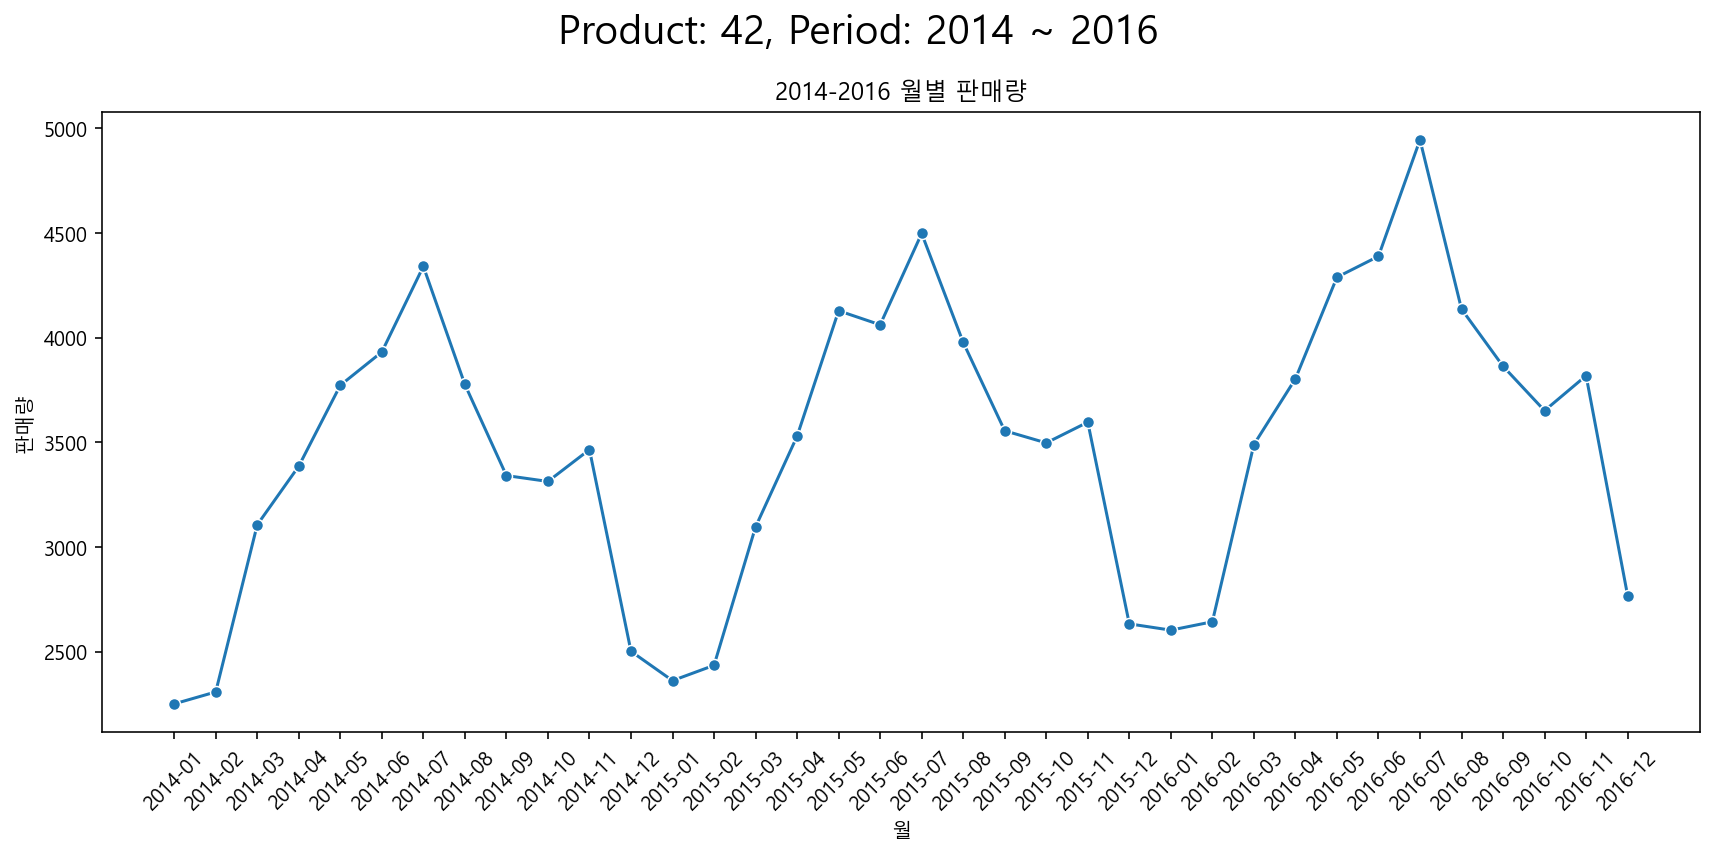

In [248]:
# 'year'와 'month'를 기준으로 데이터 그룹화
df = monthly_sales_2014_2016

# 연도와 월을 조합하여 새로운 'year_month' 열 생성
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2) 
#! 예를 들어, month가 1일 때 zfill(2)을 사용하면 "01"

# 선형 그래프 생성
plt.figure(figsize=(12, 6))
sns.lineplot(x='year_month', y='Qty', data=df, marker='o')
plt.xticks(rotation=45)  # x축의 텍스트 회전
plt.title("2014-2016 월별 판매량")
plt.suptitle(f'Product: {42}, Period: {2014} ~ {2016}', size=20) #!
plt.xlabel("월")
plt.ylabel("판매량")
plt.tight_layout()
plt.show()


- 1년간(2016년) 월별 판매량을 확인합니다.

In [148]:
sales_grocery.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 658 to 934122
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1155 non-null   datetime64[ns]
 1   Store_ID    1155 non-null   int64         
 2   Qty         1155 non-null   float64       
 3   Product_ID  1155 non-null   int64         
 4   year        1155 non-null   int64         
 5   month       1155 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 63.2 KB


,year,month,Qty
0,2016,1,2603.0
1,2016,2,2643.0
2,2016,3,3489.0
3,2016,4,3803.0
4,2016,5,4288.0
5,2016,6,4388.0
6,2016,7,4944.0
7,2016,8,4136.0
8,2016,9,3863.0
9,2016,10,3651.0


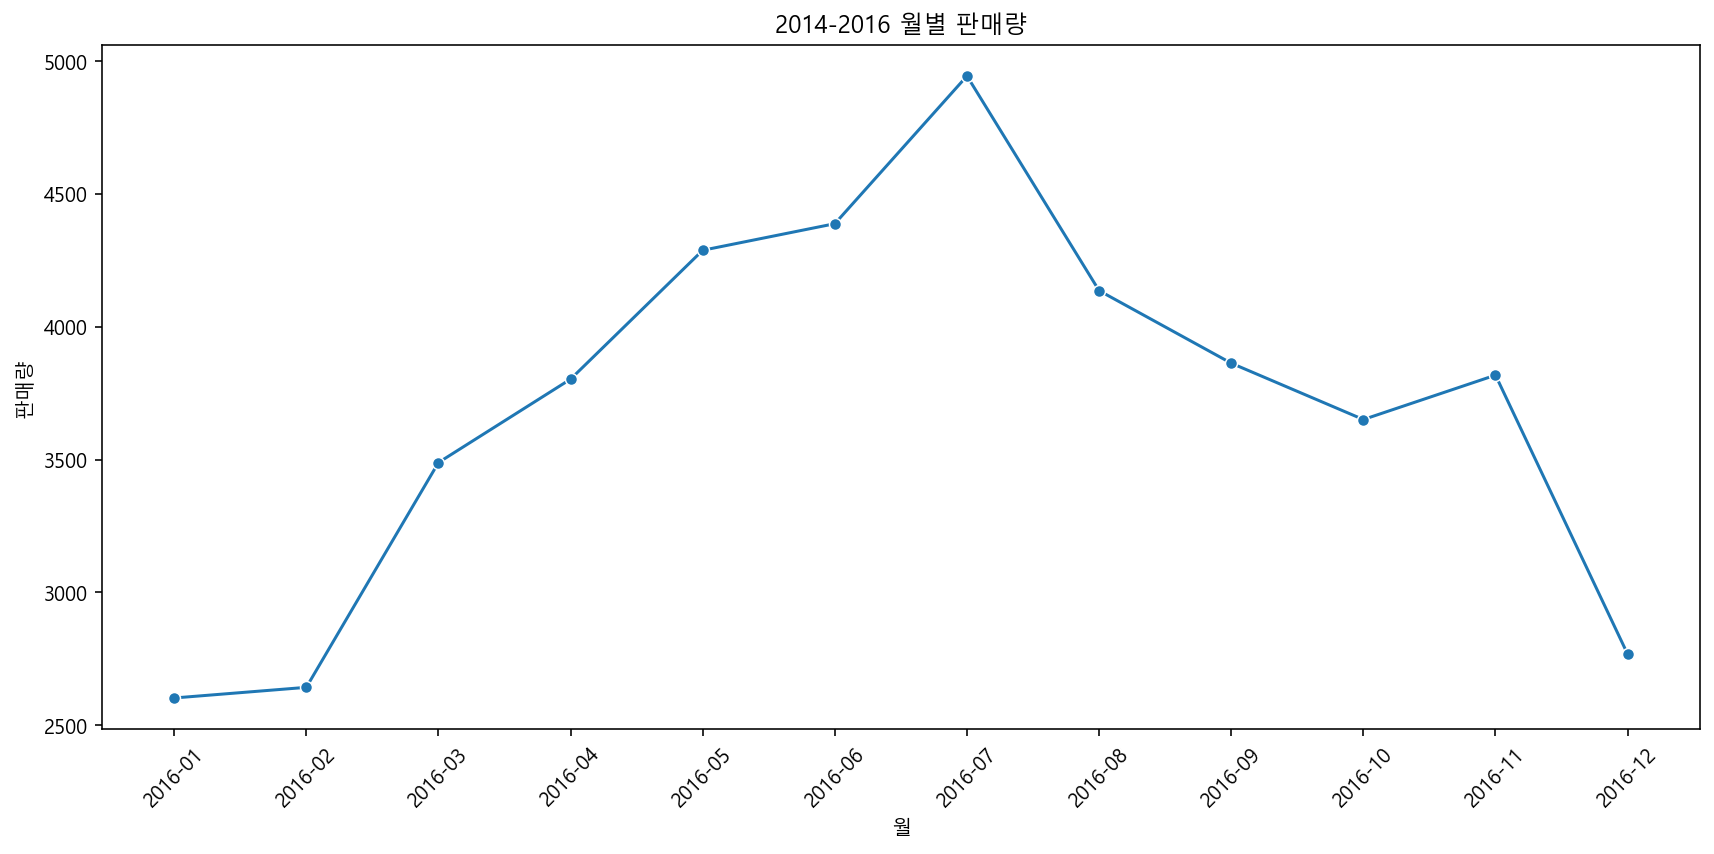

In [149]:
# 2016년 데이터 선택
sales_2014_2016 = sales_grocery[(sales_grocery['year'] >= 2016) & (sales_grocery['year'] < 2017)]

# 연도와 월을 기준으로 그룹화하고 판매량 합계 계산
monthly_sales_2016 = sales_2016.groupby(['year', 'month'], as_index=False)[['Qty']].sum() # 수정
monthly_sales_2016.head()
display(monthly_sales_2016)


df = monthly_sales_2016

# 연도와 월을 조합하여 새로운 'year_month' 열 생성
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

# 선형 그래프 생성
plt.figure(figsize=(12, 6))
sns.lineplot(x='year_month', y='Qty', data=df, marker='o')
plt.xticks(rotation=45)  # x축의 텍스트 회전
plt.title("2014-2016 월별 판매량")
plt.xlabel("월")
plt.ylabel("판매량")
plt.tight_layout()
plt.show()

### **2) 월별 방문 고객수**

- 월별 방문 고객수를 확인합니다.

- 3년간(2014년 ~ 2016년) 월별 고객 방문수를 확인합니다.

In [150]:
orders

,Date,Store_ID,CustomerCount
0,2014-01-01,25,840
1,2014-01-01,36,487
2,2014-01-02,1,1875
3,2014-01-02,2,2122
4,2014-01-02,3,3350
...,...,...,...
57553,2017-02-28,49,3183
57554,2017-02-28,50,2651
57555,2017-02-28,51,1545
57556,2017-02-28,53,1141


In [151]:
# 연도와 월을 추출
orders_2014_2016=orders
orders_2014_2016['year'] = orders['Date'].dt.year
orders_2014_2016['month'] = orders['Date'].dt.month

# 2014년부터 2016년까지의 데이터 선택
orders_2014_2016 = orders_2014_2016[(orders_2014_2016['year'] >= 2014) & (orders_2014_2016['year'] <= 2016)]

# 연도와 월을 기준으로 그룹화하고 판매량 합계 계산
monthly_orders_2014_2016 = orders_2014_2016.groupby(['year', 'month'], as_index=False)[['CustomerCount']].sum()
# monthly_orders_2014_2016 = monthly_orders_2014_2016.astype(int)

# 결과 출력
display(monthly_orders_2014_2016.head())

,year,month,CustomerCount
0,2014,1,2393528
1,2014,2,2278167
2,2014,3,2545427
3,2014,4,2455666
4,2014,5,2503262


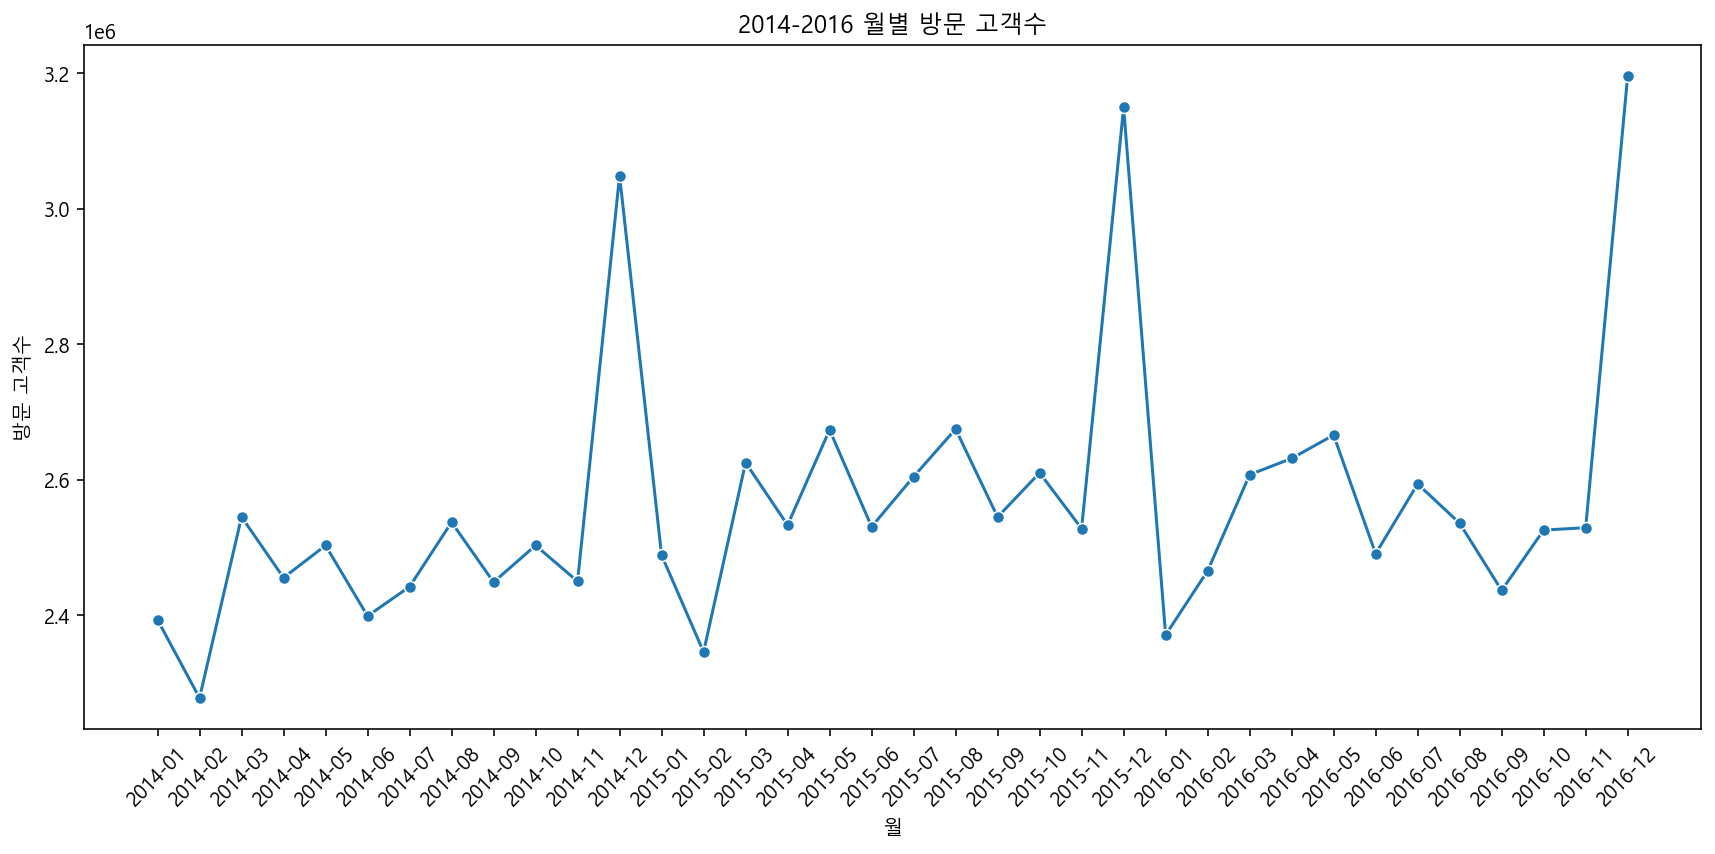

In [152]:
# 데이터 프레임 생성
df = monthly_orders_2014_2016

# 연도와 월을 조합하여 새로운 'year_month' 열 생성
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

# 선형 그래프 생성
plt.figure(figsize=(12, 6))
sns.lineplot(x='year_month', y='CustomerCount', data=df, marker='o')
plt.xticks(rotation=45)  # x축의 텍스트 회전
plt.title("2014-2016 월별 방문 고객수")
plt.xlabel("월")
plt.ylabel("방문 고객수")
plt.tight_layout()
plt.show()


In [153]:
monthly_orders_2014_2016

,year,month,CustomerCount,year_month
0,2014,1,2393528,2014-01
1,2014,2,2278167,2014-02
2,2014,3,2545427,2014-03
3,2014,4,2455666,2014-04
4,2014,5,2503262,2014-05
5,2014,6,2399144,2014-06
6,2014,7,2442341,2014-07
7,2014,8,2537572,2014-08
8,2014,9,2449131,2014-09
9,2014,10,2503310,2014-10


- 1년간(2016년) 월별 고객 방문수를 확인합니다.

In [154]:
# 2016년 데이터 선택
orders_2016 = monthly_orders_2014_2016[(monthly_orders_2014_2016['year'] >= 2016) & (monthly_orders_2014_2016['year'] < 2017)]

# 연도와 월을 기준으로 그룹화하고 판매량 합계 계산
monthly_orders_2016 = orders_2016.groupby(['year', 'month'], as_index=False)[['CustomerCount']].sum()
monthly_orders_2016 = monthly_orders_2016.astype(int)

# 결과 출력
display(monthly_orders_2016)

,year,month,CustomerCount
0,2016,1,2371205
1,2016,2,2465798
2,2016,3,2607658
3,2016,4,2631797
4,2016,5,2666157
5,2016,6,2491063
6,2016,7,2594087
7,2016,8,2536111
8,2016,9,2436974
9,2016,10,2526000


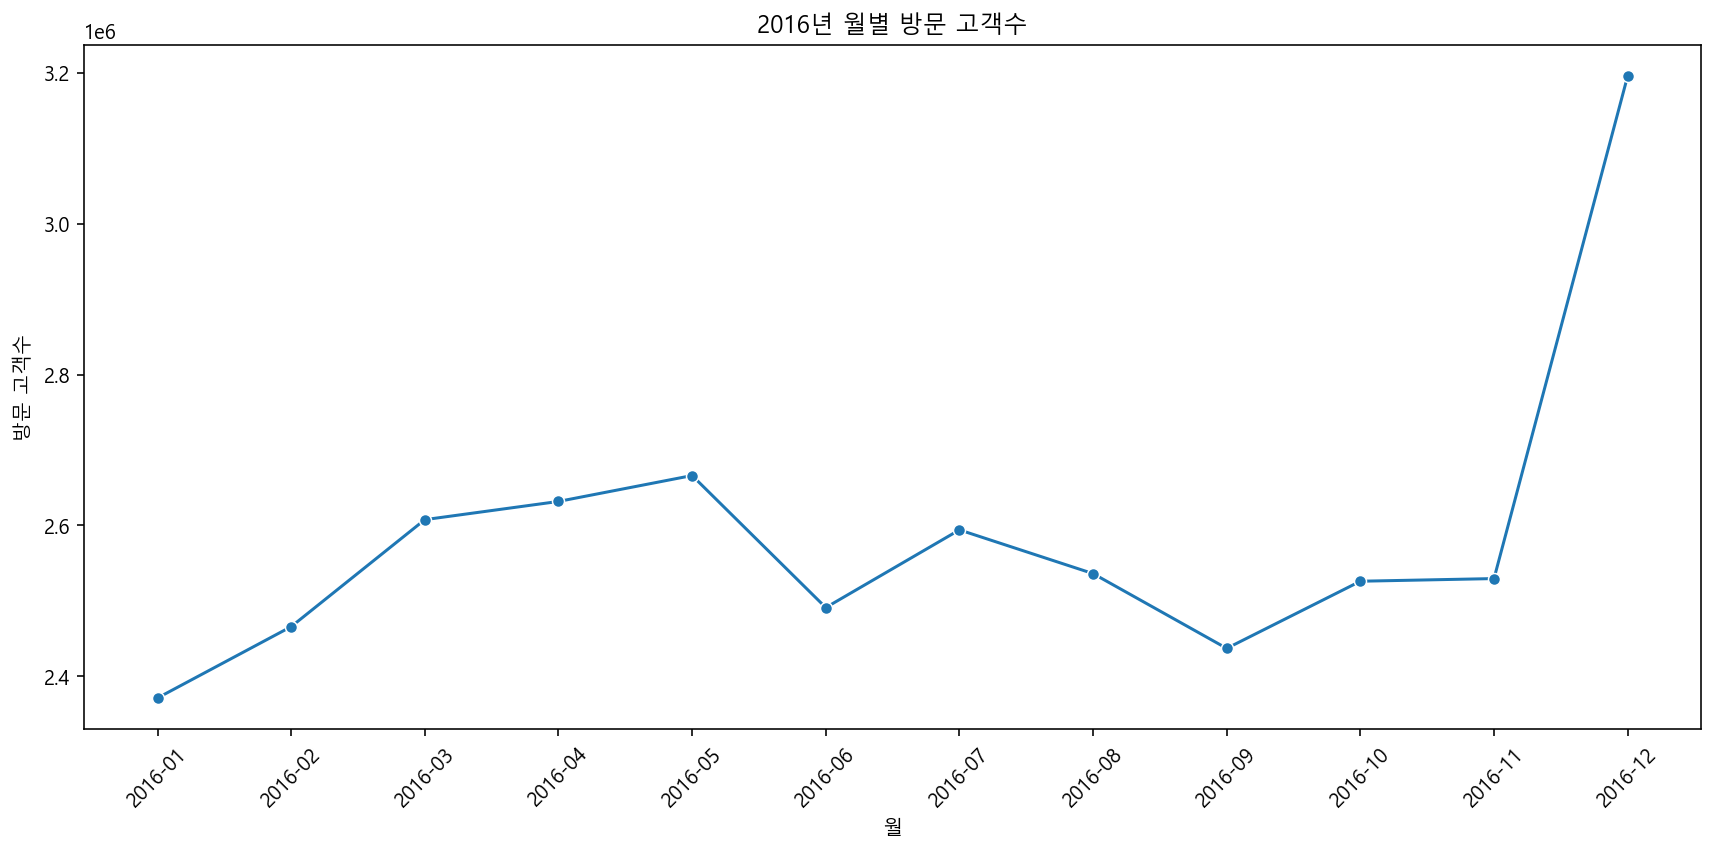

In [155]:
df=monthly_orders_2016

# 연도와 월을 조합하여 새로운 'year_month' 열 생성
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

# 선형 그래프 생성
plt.figure(figsize=(12, 6))
sns.lineplot(x='year_month', y='CustomerCount', data=df, marker='o')
plt.xticks(rotation=45)  # x축의 텍스트 회전
plt.title("2016년 월별 방문 고객수")
plt.xlabel("월")
plt.ylabel("방문 고객수")
plt.tight_layout()
plt.show()


## **(3) 시계열 패턴 찾아보기 #1**

- 판매량을 선그래프로 시각화해 시계열 패턴을 찾아 봅니다.
- 대상 기간을 변경해 가면서 패턴을 확인해 보길 권고합니다.
- 다음과 같은 시각화가 포함될 수 있습니다.
    - 3년간(2014년~2016년)상품별 판매량 추이
    - 2016년 상품별 판매량 추이
    - 대상 상품과 같은 카테고리의 상품별 판매량 추이
    - 휘발류 가격과 상품 판매량 추이 비교
    - 방문 고객수와 상품 판매량 추이 비교
    - 기타 등등...

### **1) 상품별 판매량 추이**

- 대상 상품의 판매량 추이를 선그래프로 시각화해 확인합니다.

In [156]:
# 위에 함

### **2) 대상 상품과 같은 카테고리의 상품별 판매량 추이**

- 대상 상품과 같은 카테고리에 포함된 상품 판매량을 집계해 판매량 추이를 선그래프로 시각화해 확인합니다.

In [157]:
display(sales)
# display(orders)
# display(oil_price)
# display(stores)
display(products)

,Date,Store_ID,Qty,Product_ID
0,2014-01-01,1,0.000,3
1,2014-01-01,1,0.000,5
2,2014-01-01,1,0.000,7
3,2014-01-01,1,0.000,8
4,2014-01-01,1,0.000,10
...,...,...,...,...
934270,2017-02-28,54,24.000,38
934271,2017-02-28,54,49.222,24
934272,2017-02-28,54,12.000,27
934273,2017-02-28,54,59.000,29


,Product_ID,Product_Code,SubCategory,Category,LeadTime,Price
0,20,HG001,Gardening Tools,Household Goods,2,50
1,27,HH001,Home Appliances,Household Goods,2,150
2,16,HK001,Kitchen,Household Goods,2,23
3,15,HK002,Kitchen,Household Goods,2,41
4,32,GS001,Seafood,Grocery,3,34
5,38,DA001,Wine,Drink,2,12
6,29,FP001,Prepared,Food,2,18
7,11,FF001,Frozen,Food,2,29
8,10,GE001,EGGS,Grocery,2,5
9,24,GM001,Meats,Grocery,3,17


In [158]:
products.loc[products['Product_ID'].isin([42]), 'Category'].to_list() # 답 일부

['Grocery']

In [159]:
products.loc[products['Category'].isin(['Grocery']), 'Product_ID'].to_list() # 답 일부

[32, 10, 24, 42]

In [160]:
sales_products = pd.merge(sales, products, on='Product_ID', how='inner')
sales_products = sales_products[['Date','Category','SubCategory','Qty']]
sales_products_grocery = sales_products[sales_products['Category']=='Grocery']
sales_products_grocery = sales_products_grocery.drop('Category', axis=1)
sales_products_grocery
## sales = 날짜별 / store별 / prodct ID여러개 있음

,Date,SubCategory,Qty
248832,2014-01-01,EGGS,0.0
248833,2014-01-01,EGGS,0.0
248834,2014-01-01,EGGS,0.0
248835,2014-01-01,EGGS,0.0
248836,2014-01-01,EGGS,0.0
...,...,...,...
934270,2017-02-24,Agricultural products,91.0
934271,2017-02-25,Agricultural products,105.0
934272,2017-02-26,Agricultural products,108.0
934273,2017-02-27,Agricultural products,78.0


,year,month,SubCategory,Qty
0,2014,1,Agricultural products,2251.000000
1,2014,1,EGGS,252982.000000
2,2014,1,Meats,490276.380212
3,2014,1,Seafood,36938.301902
4,2014,2,Agricultural products,2308.000000
...,...,...,...,...
139,2016,11,Seafood,35419.240999
140,2016,12,Agricultural products,2768.000000
141,2016,12,EGGS,338712.000000
142,2016,12,Meats,606028.189242


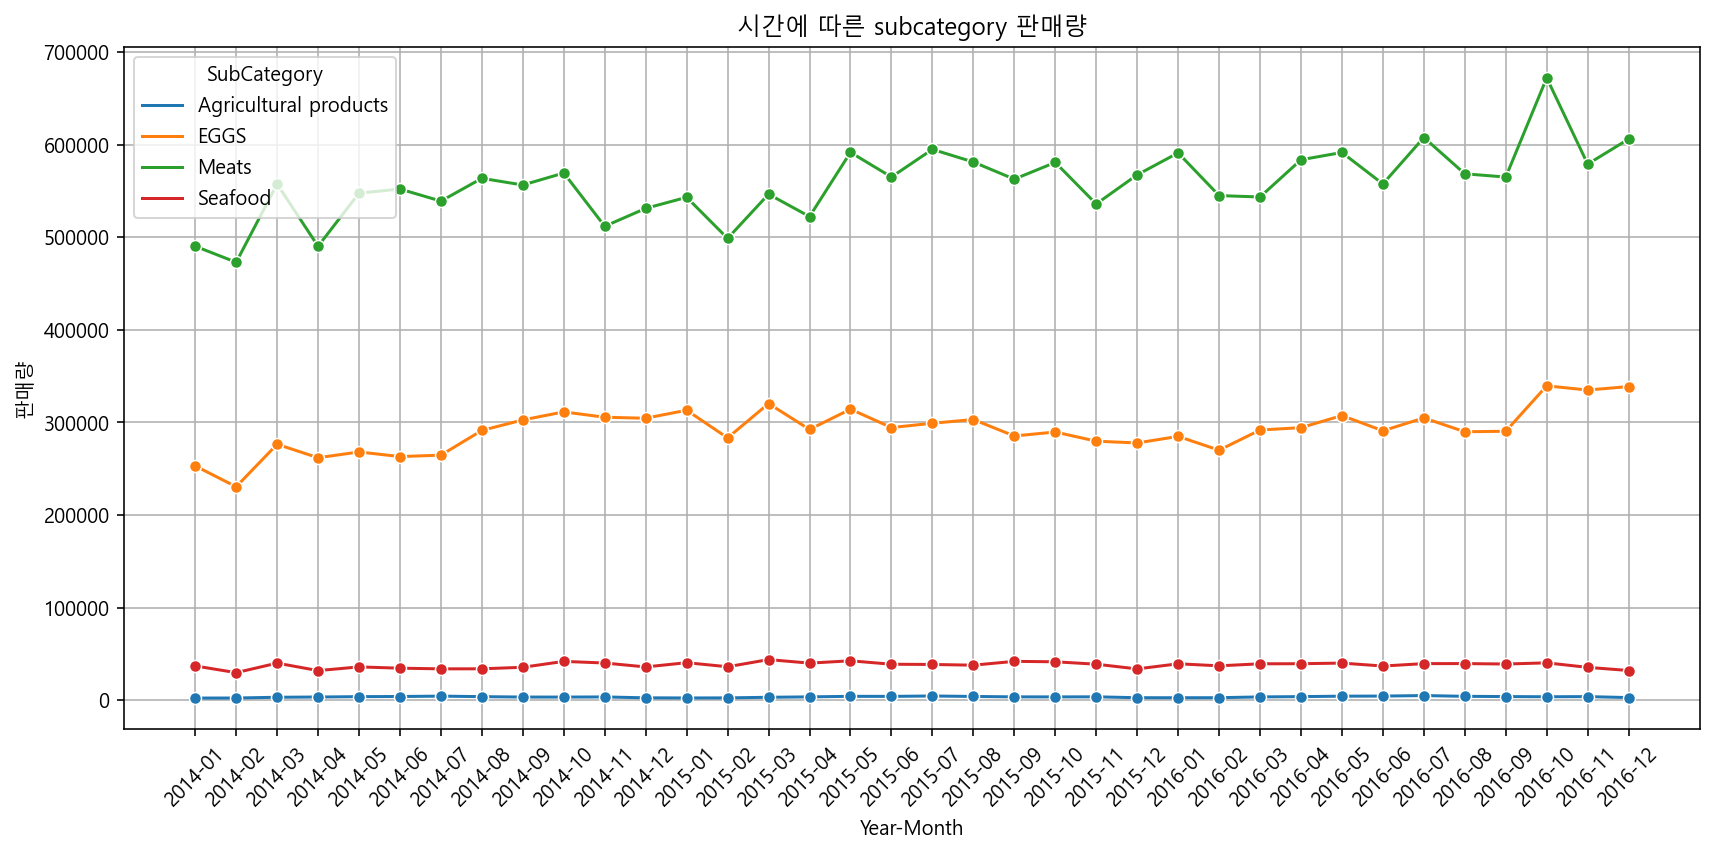

In [161]:
# 위와 동일
# 연도와 월을 추출
sales_products_grocery['year'] = sales_products_grocery['Date'].dt.year
sales_products_grocery['month'] = sales_products_grocery['Date'].dt.month

# 2014년부터 2016년까지의 데이터 선택
sales_products_2014_2016 = sales_products_grocery[(sales_products_grocery['year'] >= 2014) & (sales_products_grocery['year'] <= 2016)]

# 연도와 월을 기준으로 그룹화하고 판매량 합계 계산
monthly_sales_products_2014_2016 = sales_products_2014_2016.groupby(['year', 'month','SubCategory'], as_index=False)[['Qty']].sum()

# 결과 출력
display(monthly_sales_products_2014_2016)




# 데이터 프레임 생성
df = monthly_sales_products_2014_2016

# 연도와 월을 조합하여 새로운 'year_month' 열 생성
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

# 선그래프 생성
plt.figure(figsize=(12, 6)) 
sns.lineplot(data=df, x='year_month', y='Qty', hue='SubCategory', marker='o')  
plt.title("시간에 따른 subcategory 판매량")  
plt.xlabel("Year-Month")  
plt.ylabel("판매량") 
plt.xticks(rotation=45)
plt.grid(True)  
plt.tight_layout() 
plt.show() 


### **3) 휘발유 가격과 상품 판매량 추이 비교**

- 휘발유 가격 추이와 대상 상품 판매량 추이를 선그래프로 시각화해 비교합니다.

In [162]:
oil_price

,Date,WTI_Price
0,2014-01-01,NaN
1,2014-01-02,95.14
2,2014-01-03,93.66
3,2014-01-06,93.12
4,2014-01-07,93.31
...,...,...
820,2017-02-22,53.61
821,2017-02-23,54.48
822,2017-02-24,53.99
823,2017-02-27,54.04


In [163]:
sales_products_grocery

,Date,SubCategory,Qty,year,month
248832,2014-01-01,EGGS,0.0,2014,1
248833,2014-01-01,EGGS,0.0,2014,1
248834,2014-01-01,EGGS,0.0,2014,1
248835,2014-01-01,EGGS,0.0,2014,1
248836,2014-01-01,EGGS,0.0,2014,1
...,...,...,...,...,...
934270,2017-02-24,Agricultural products,91.0,2017,2
934271,2017-02-25,Agricultural products,105.0,2017,2
934272,2017-02-26,Agricultural products,108.0,2017,2
934273,2017-02-27,Agricultural products,78.0,2017,2


In [164]:
oil_price_qty = pd.merge(sales_products_grocery, oil_price, on='Date', how='inner')
oil_price_qty

,Date,SubCategory,Qty,year,month,WTI_Price
0,2014-01-01,EGGS,0.0,2014,1,NaN
1,2014-01-01,EGGS,0.0,2014,1,NaN
2,2014-01-01,EGGS,0.0,2014,1,NaN
3,2014-01-01,EGGS,0.0,2014,1,NaN
4,2014-01-01,EGGS,0.0,2014,1,NaN
...,...,...,...,...,...,...
134146,2017-02-28,Seafood,5.0,2017,2,54.0
134147,2017-02-28,Seafood,4.0,2017,2,54.0
134148,2017-02-28,Agricultural products,87.0,2017,2,54.0
134149,2014-12-25,Agricultural products,81.0,2014,12,NaN


In [165]:
# 위와 동일
# 연도와 월을 추출
oil_price_qty['year'] = oil_price_qty['Date'].dt.year
oil_price_qty['month'] = oil_price_qty['Date'].dt.month
oil_price_qty['day'] = oil_price_qty['Date'].dt.day # 추가

# 2014년부터 2016년까지의 데이터 선택
oil_price_qty_2014_2016 = oil_price_qty[(oil_price_qty['year'] >= 2014) & (oil_price_qty['year'] <= 2016)]

# 연도와 월을 기준으로 그룹화하고 판매량 합계 계산
monthly_oil_price_qty_2014_2016 = oil_price_qty_2014_2016.groupby(['year', 'month','day'], as_index=False)[['WTI_Price','Qty']].sum() # day 추가
monthly_oil_price_qty_2014_2016 = monthly_oil_price_qty_2014_2016.astype(int)

# 결과 출력
display(monthly_oil_price_qty_2014_2016)



##### y축 분리전
# # 데이터 프레임 생성
df = monthly_oil_price_qty_2014_2016

# # 연도와 월을 조합하여 새로운 'year_month' 열 생성
# df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

# # 선그래프 생성
# plt.figure(figsize=(12, 6)) 
# sns.lineplot(data=df, x='year_month', y='WTI_Price',  marker='o', label='WTI_Price') # hue 제거유가 WTI_Price
# sns.lineplot(data=df, x='year_month', y='Qty',  marker='o', label='Qty') # 판매량 Qty
# plt.title("시간에 따른 유가, 판매량")  
# plt.xlabel("Year-Month")  
# plt.ylabel("유가, 판매량") 
# plt.grid(True)  
# plt.tight_layout() 
# plt.show() 


,year,month,day,WTI_Price,Qty
0,2014,1,1,0,316
1,2014,1,2,15507,35336
2,2014,1,3,15266,32032
3,2014,1,6,15178,18564
4,2014,1,7,15209,20472
...,...,...,...,...,...
778,2016,12,26,0,37687
779,2016,12,27,8609,27769
780,2016,12,28,8803,30410
781,2016,12,29,8769,31304


In [166]:
# # 시간따른 유가,판매량  / y축 하나여서 수정해야함
# df_melted = df.melt(id_vars=['year_month', 'SubCategory'], 
#                     value_vars=['WTI_Price', 'Qty'], 
#                     var_name='Variable', 
#                     value_name='Value')

# # 선그래프 생성
# plt.figure(figsize=(12, 6))
# sns.lineplot(data=df_melted, x='year_month', y='Value', hue='Variable', style='SubCategory', markers=True)
# plt.title("Trends by SubCategory")  # 그래프 제목
# plt.xlabel("Year-Month")  # x축 레이블
# plt.ylabel("Value")  # y축 레이블
# plt.grid(True)  # 격자 표시
# plt.tight_layout()  # 레이아웃 정렬
# plt.show()  # 그래프 표시

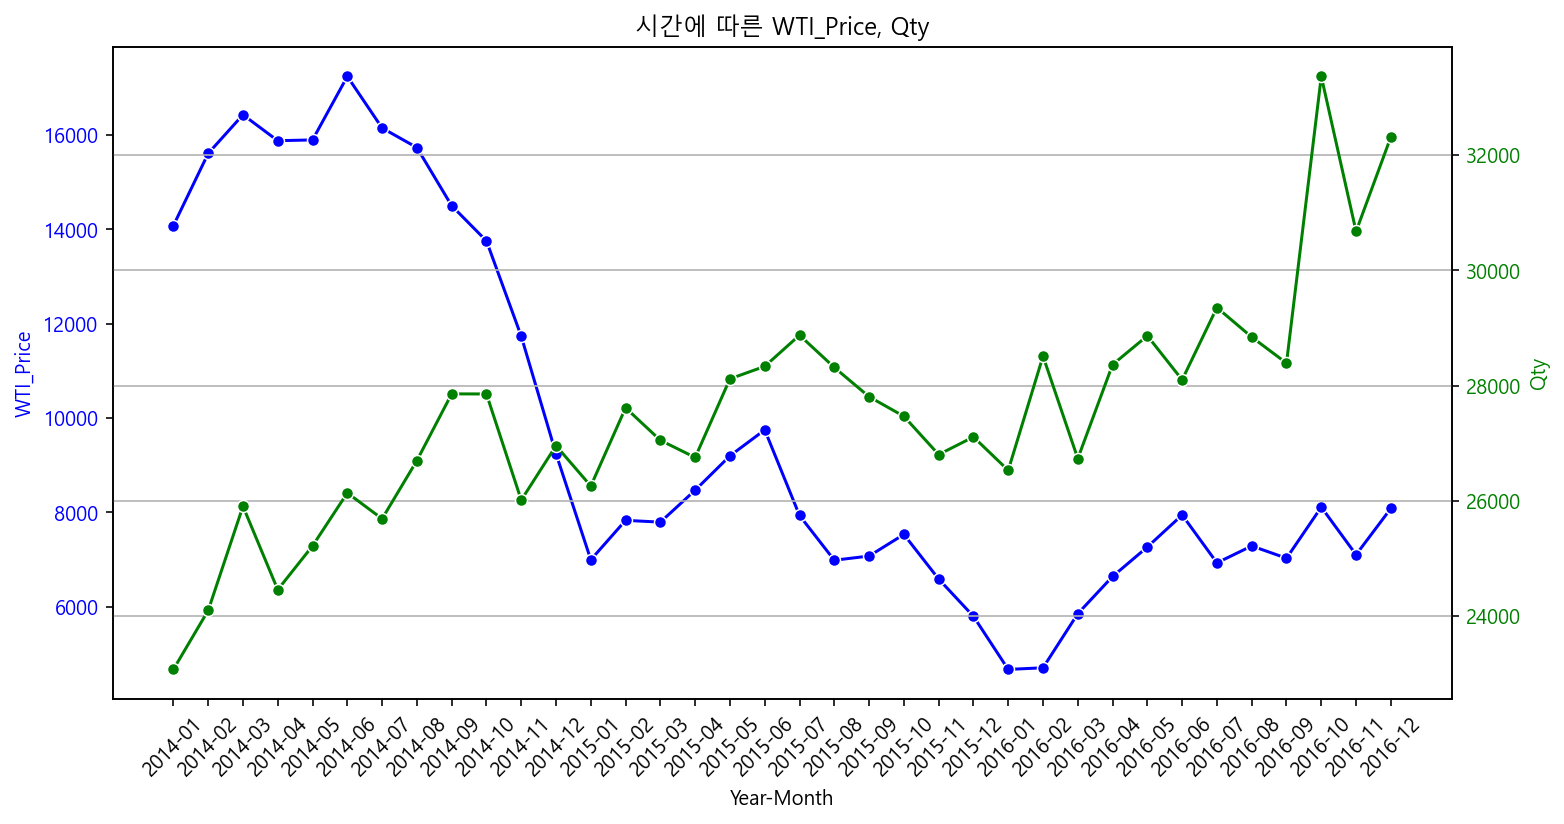

In [167]:
# 연도와 월을 결합하여 'year_month' 생성
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2) 

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(12, 6))

# 첫 번째 축 (왼쪽 y축)
ax1.set_xlabel('Year-Month')  # x축 레이블
ax1.set_ylabel('WTI_Price', color='b')  # 왼쪽 y축 레이블
sns.lineplot(data=df, x='year_month', y='WTI_Price', ax=ax1, color='b', marker='o', ci=None)  # 선그래프
ax1.tick_params(axis='y', labelcolor='b')  # y축 색상 변경
plt.xticks(rotation=45)

# 두 번째 축 (오른쪽 y축)
ax2 = ax1.twinx()  # 두 번째 축 생성
ax2.set_ylabel('Qty', color='g')  # 오른쪽 y축 레이블
sns.lineplot(data=df, x='year_month', y='Qty', ax=ax2, color='g', marker='o', ci=None)  # 선그래프
ax2.tick_params(axis='y', labelcolor='g')  # y축 색상 변경
plt.xticks(rotation=45)

# 격자 표시
plt.grid(True) 

# 그래프 표시
plt.title("시간에 따른 WTI_Price, Qty") 
plt.show() 

,year,month,day,WTI_Price,Qty
0,2015,1,1,0,828
1,2015,1,2,8593,39348
2,2015,1,5,8158,30094
3,2015,1,6,7820,27738
4,2015,1,7,7936,28176
...,...,...,...,...,...
517,2016,12,26,0,37687
518,2016,12,27,8609,27769
519,2016,12,28,8803,30410
520,2016,12,29,8769,31304


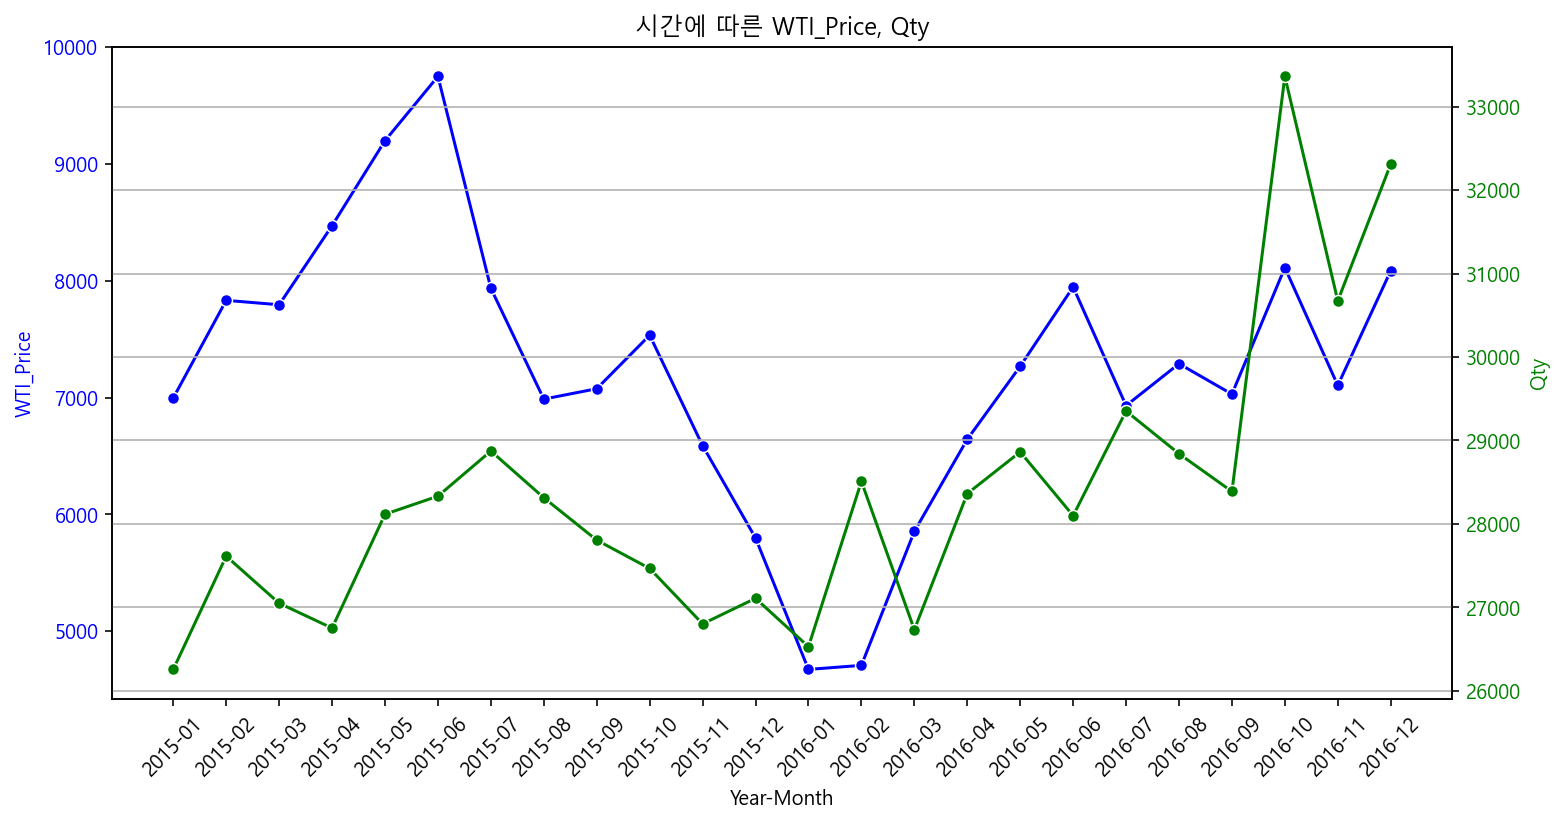

In [201]:
# 2015, 2016

# 2014년부터 2016년까지의 데이터 선택
oil_price_qty_2014_2016 = oil_price_qty[(oil_price_qty['year'] >= 2015) & (oil_price_qty['year'] <= 2016)]

# 연도와 월을 기준으로 그룹화하고 판매량 합계 계산
monthly_oil_price_qty_2014_2016 = oil_price_qty_2014_2016.groupby(['year', 'month','day'], as_index=False)[['WTI_Price','Qty']].sum() # day 추가
monthly_oil_price_qty_2014_2016 = monthly_oil_price_qty_2014_2016.astype(int)

# 결과 출력
display(monthly_oil_price_qty_2014_2016)



##### y축 분리전
# # 데이터 프레임 생성
df = monthly_oil_price_qty_2014_2016




# 연도와 월을 결합하여 'year_month' 생성
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2) 

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(12, 6))

# 첫 번째 축 (왼쪽 y축)
ax1.set_xlabel('Year-Month')  # x축 레이블
ax1.set_ylabel('WTI_Price', color='b')  # 왼쪽 y축 레이블
sns.lineplot(data=df, x='year_month', y='WTI_Price', ax=ax1, color='b', marker='o', ci=None)  # 선그래프
ax1.tick_params(axis='y', labelcolor='b')  # y축 색상 변경
plt.xticks(rotation=45)

# 두 번째 축 (오른쪽 y축)
ax2 = ax1.twinx()  # 두 번째 축 생성
ax2.set_ylabel('Qty', color='g')  # 오른쪽 y축 레이블
sns.lineplot(data=df, x='year_month', y='Qty', ax=ax2, color='g', marker='o', ci=None)  # 선그래프
ax2.tick_params(axis='y', labelcolor='g')  # y축 색상 변경
plt.xticks(rotation=45)

# 격자 표시
plt.grid(True) 

# 그래프 표시
plt.title("시간에 따른 WTI_Price, Qty") 
plt.show() 

### **4) 14일 동안 휘발유 가격 평균과 상품 판매량 추이 비교**

- 일별 휘발유 가격 변동보다는 최근 14일 동안의 휘발유 가격 평균값의 추이와 비교합니다.

In [168]:
# ROLLING AVERAGE
# 14일 데이터 만들기
# 일자 데이터 필요

In [169]:
df2=df
df2=df2.drop('year_month', axis=1)
df2

,year,month,day,WTI_Price,Qty
0,2014,1,1,0,316
1,2014,1,2,15507,35336
2,2014,1,3,15266,32032
3,2014,1,6,15178,18564
4,2014,1,7,15209,20472
...,...,...,...,...,...
778,2016,12,26,0,37687
779,2016,12,27,8609,27769
780,2016,12,28,8803,30410
781,2016,12,29,8769,31304


In [170]:
df2['WTI_Price_Mean'] = df2['WTI_Price'].rolling(14, min_periods=1).mean()
df2

,year,month,day,WTI_Price,Qty,WTI_Price_Mean
0,2014,1,1,0,316,0.000000
1,2014,1,2,15507,35336,7753.500000
2,2014,1,3,15266,32032,10257.666667
3,2014,1,6,15178,18564,11487.750000
4,2014,1,7,15209,20472,12232.000000
...,...,...,...,...,...,...
778,2016,12,26,0,37687,7818.214286
779,2016,12,27,8609,27769,7852.785714
780,2016,12,28,8803,30410,7889.714286
781,2016,12,29,8769,31304,7916.357143


,year,month,day,WTI_Price_Mean,Qty
0,2014,1,1,0,316
1,2014,1,2,7753,35336
2,2014,1,3,10257,32032
3,2014,1,6,11487,18564
4,2014,1,7,12232,20472
...,...,...,...,...,...
778,2016,12,26,7818,37687
779,2016,12,27,7852,27769
780,2016,12,28,7889,30410
781,2016,12,29,7916,31304


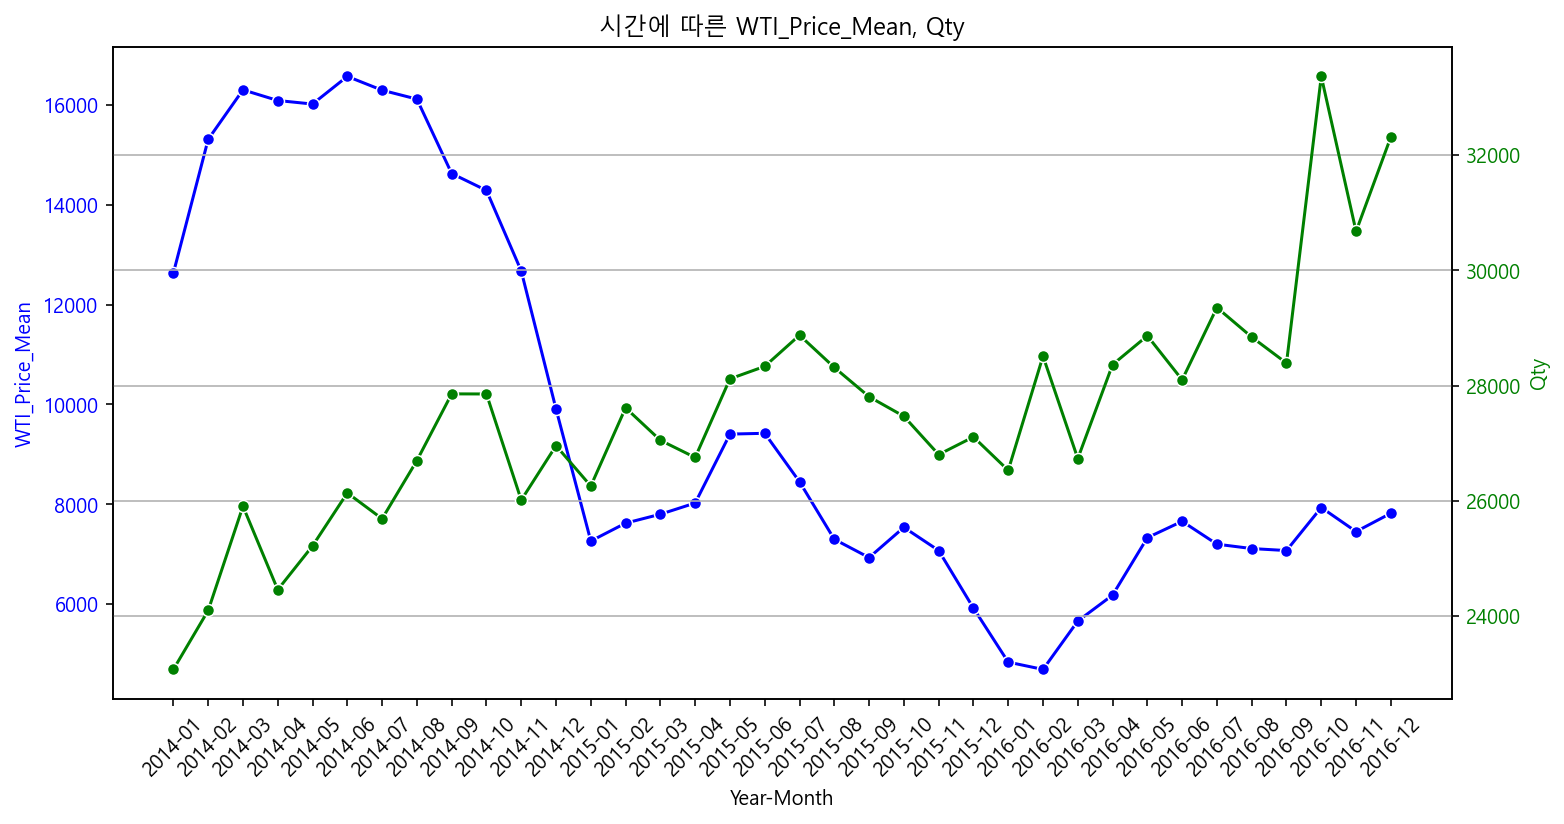

In [171]:
# 위와 동일
# df2 = df2.reset_index()

# 2014년부터 2016년까지의 데이터 선택
df2 = df2[(df2['year'] >= 2014) & (df2['year'] <= 2016)]

# 연도와 월을 기준으로 그룹화하고 판매량 합계 계산
df2 = df2.groupby(['year', 'month','day'])['WTI_Price_Mean','Qty'].sum() # day 추가
df2 = df2.astype(int)

# 결과 출력
display(df2.reset_index())

# 데이터 프레임 생성
df = df2.reset_index()







# 연도와 월을 결합하여 'year_month' 생성
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(12, 6))

# 첫 번째 축 (왼쪽 y축)
ax1.set_xlabel('Year-Month')  # x축 레이블
ax1.set_ylabel('WTI_Price_Mean', color='b')  # 왼쪽 y축 레이블
sns.lineplot(data=df, x='year_month', y='WTI_Price_Mean', ax=ax1, color='b', marker='o', ci=None)  # 선그래프
ax1.tick_params(axis='y', labelcolor='b')  # y축 색상 변경
plt.xticks(rotation=45)

# 두 번째 축 (오른쪽 y축)
ax2 = ax1.twinx()  # 두 번째 축 생성
ax2.set_ylabel('Qty', color='g')  # 오른쪽 y축 레이블
sns.lineplot(data=df, x='year_month', y='Qty', ax=ax2, color='g', marker='o', ci=None)  # 선그래프
ax2.tick_params(axis='y', labelcolor='g')  # y축 색상 변경
plt.xticks(rotation=45)
# 격자 표시
plt.grid(True) 

# 그래프 표시
plt.title("시간에 따른 WTI_Price_Mean, Qty") 
plt.show() 

### **5) 방문 고객수와 상품 판매량 추이 비교**

- 방문 고객수 추이와 대상 상품 판매량 추이를 선그래프로 시각화해 비교합니다.

In [174]:
orders 

,Date,Store_ID,CustomerCount,year,month
0,2014-01-01,25,840,2014,1
1,2014-01-01,36,487,2014,1
2,2014-01-02,1,1875,2014,1
3,2014-01-02,2,2122,2014,1
4,2014-01-02,3,3350,2014,1
...,...,...,...,...,...
57553,2017-02-28,49,3183,2017,2
57554,2017-02-28,50,2651,2017,2
57555,2017-02-28,51,1545,2017,2
57556,2017-02-28,53,1141,2017,2


In [175]:
sales_products_grocery

,Date,SubCategory,Qty,year,month
248832,2014-01-01,EGGS,0.0,2014,1
248833,2014-01-01,EGGS,0.0,2014,1
248834,2014-01-01,EGGS,0.0,2014,1
248835,2014-01-01,EGGS,0.0,2014,1
248836,2014-01-01,EGGS,0.0,2014,1
...,...,...,...,...,...
934270,2017-02-24,Agricultural products,91.0,2017,2
934271,2017-02-25,Agricultural products,105.0,2017,2
934272,2017-02-26,Agricultural products,108.0,2017,2
934273,2017-02-27,Agricultural products,78.0,2017,2


In [176]:
# 날짜와 storeid로 합쳐야함
ord1 = orders.groupby('Date')['CustomerCount'].sum() # 날짜별 고객수
ord1 = ord1.reset_index()
ord1

,Date,CustomerCount
0,2014-01-01,1327
1,2014-01-02,90716
2,2014-01-03,84488
3,2014-01-04,101361
4,2014-01-05,93475
...,...,...
1145,2017-02-24,89170
1146,2017-02-25,101255
1147,2017-02-26,80860
1148,2017-02-27,79336


In [177]:
sales1 = sales_products_grocery.groupby('Date')['Qty'].sum() # 판매량
sales1 = sales1.reset_index()
sales1

,Date,Qty
0,2014-01-01,316.157000
1,2014-01-02,35336.643958
2,2014-01-03,32032.468719
3,2014-01-04,34557.982838
4,2014-01-05,29491.302000
...,...,...
1150,2017-02-24,38533.122986
1151,2017-02-25,33742.627958
1152,2017-02-26,26946.895974
1153,2017-02-27,28194.966043


In [178]:
df3 =pd.merge(ord1, sales1, on='Date', how='inner')
df3

,Date,CustomerCount,Qty
0,2014-01-01,1327,316.157000
1,2014-01-02,90716,35336.643958
2,2014-01-03,84488,32032.468719
3,2014-01-04,101361,34557.982838
4,2014-01-05,93475,29491.302000
...,...,...,...
1145,2017-02-24,89170,38533.122986
1146,2017-02-25,101255,33742.627958
1147,2017-02-26,80860,26946.895974
1148,2017-02-27,79336,28194.966043


In [179]:
df3

,Date,CustomerCount,Qty
0,2014-01-01,1327,316.157000
1,2014-01-02,90716,35336.643958
2,2014-01-03,84488,32032.468719
3,2014-01-04,101361,34557.982838
4,2014-01-05,93475,29491.302000
...,...,...,...
1145,2017-02-24,89170,38533.122986
1146,2017-02-25,101255,33742.627958
1147,2017-02-26,80860,26946.895974
1148,2017-02-27,79336,28194.966043


,Date,year,month,day,CustomerCount,Qty
0,2014-01-01,2014,1,1,1327,316
1,2014-01-02,2014,1,2,90716,35336
2,2014-01-03,2014,1,3,84488,32032
3,2014-01-04,2014,1,4,101361,34557
4,2014-01-05,2014,1,5,93475,29491
...,...,...,...,...,...,...
1086,2016-12-27,2016,12,27,95643,27769
1087,2016-12-28,2016,12,28,103717,30410
1088,2016-12-29,2016,12,29,102665,31304
1089,2016-12-30,2016,12,30,127771,41450


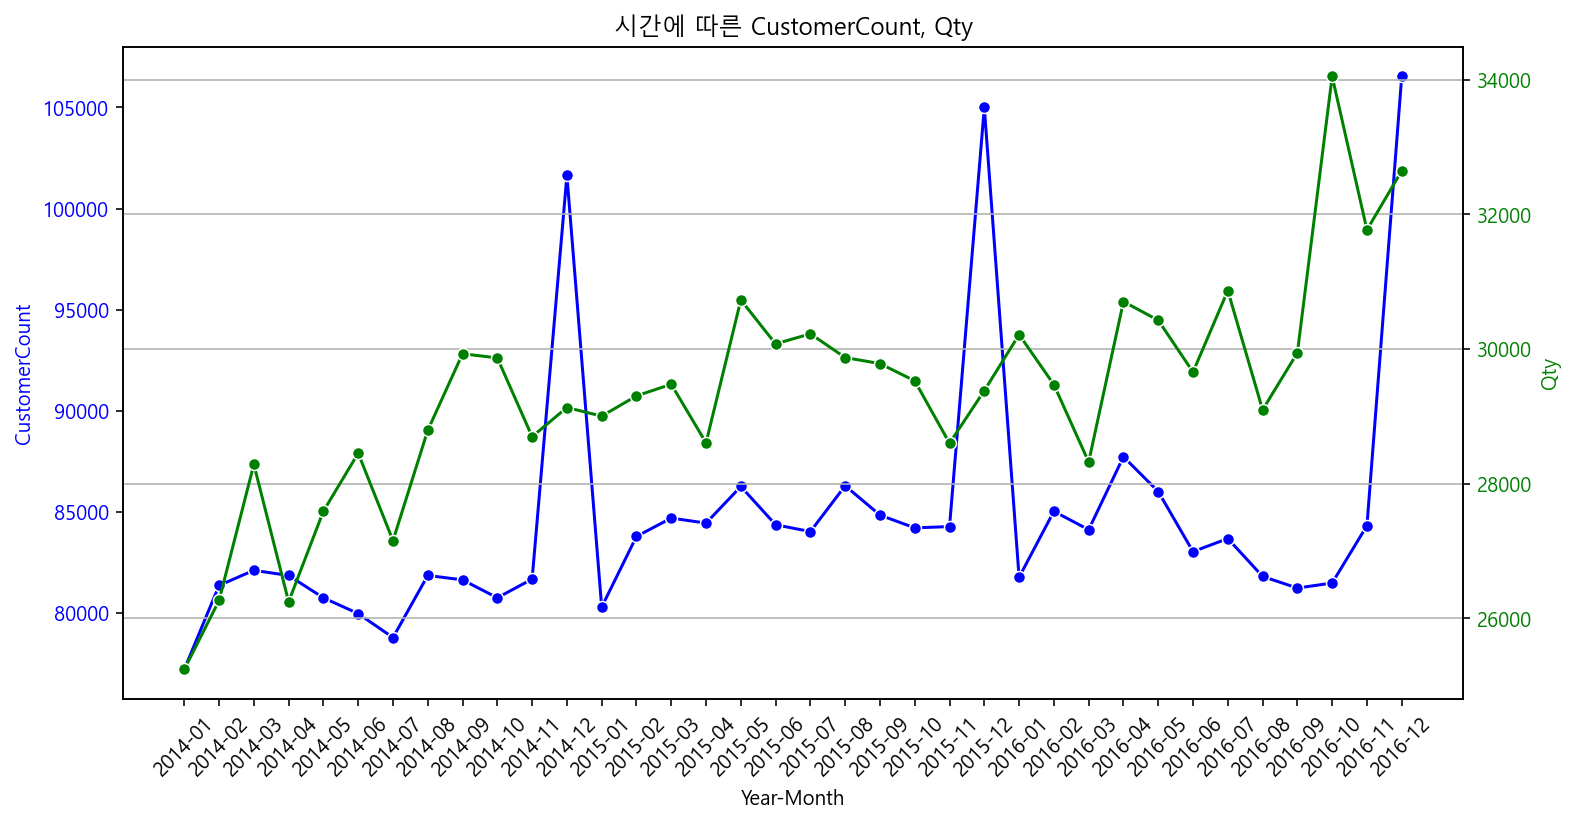

In [180]:
# 위와 동일 #★
# df3 = df3.reset_index()
# df2['Date']=pd.to_datetime(df2['Date'])
df3['year'] = df3['Date'].dt.year 
df3['month'] = df3['Date'].dt.month 
df3['day'] = df3['Date'].dt.day 

# 2014년부터 2016년까지의 데이터 선택
df3 = df3[(    df3['year']     >= 2014) & (df3['year'] <= 2016)]

# 연도와 월을 기준으로 그룹화하고 판매량 합계 계산
df3 = df3.groupby(['Date','year', 'month','day'])['CustomerCount','Qty'].sum() # day 추가
df3 = df3.astype(int)

# 결과 출력
display(df3.reset_index())

# # 데이터 프레임 생성
df = df3.reset_index()







# 연도와 월을 결합하여 'year_month' 생성
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(12, 6))

# 첫 번째 축 (왼쪽 y축)
ax1.set_xlabel('Year-Month')  # x축 레이블
ax1.set_ylabel('CustomerCount', color='b')  # 왼쪽 y축 레이블
sns.lineplot(data=df, x='year_month', y='CustomerCount', ax=ax1, color='b', marker='o', ci=None)  # 선그래프
ax1.tick_params(axis='y', labelcolor='b')  # y축 색상 변경
plt.xticks(rotation=45)

# 두 번째 축 (오른쪽 y축)
ax2 = ax1.twinx()  # 두 번째 축 생성
ax2.set_ylabel('Qty', color='g')  # 오른쪽 y축 레이블
sns.lineplot(data=df, x='year_month', y='Qty', ax=ax2, color='g', marker='o', ci=None)  # 선그래프
ax2.tick_params(axis='y', labelcolor='g')  # y축 색상 변경
plt.xticks(rotation=45)

# 격자 표시
plt.grid(True) 

# 그래프 표시
plt.title("시간에 따른 CustomerCount, Qty") 
plt.show() 

## **(4) 시계열 패턴 찾아보기 #2**

- 상품별 판매량의 변화량을 비교합니다.
- **df['변수'].diff()** 형태로 변수에 대한 변화량을 확인할 수 있습니다.
- 변화량을 선그래프로 시각화하거나, 변화량의 분포를 히스토그램으로 시각화할 수 있습니다.

### **1) 상품별 변화량 비교**

In [181]:
df

,Date,year,month,day,CustomerCount,Qty,year_month
0,2014-01-01,2014,1,1,1327,316,2014-01
1,2014-01-02,2014,1,2,90716,35336,2014-01
2,2014-01-03,2014,1,3,84488,32032,2014-01
3,2014-01-04,2014,1,4,101361,34557,2014-01
4,2014-01-05,2014,1,5,93475,29491,2014-01
...,...,...,...,...,...,...,...
1086,2016-12-27,2016,12,27,95643,27769,2016-12
1087,2016-12-28,2016,12,28,103717,30410,2016-12
1088,2016-12-29,2016,12,29,102665,31304,2016-12
1089,2016-12-30,2016,12,30,127771,41450,2016-12


In [182]:
df['Qty']

0         316
1       35336
2       32032
3       34557
4       29491
        ...  
1086    27769
1087    30410
1088    31304
1089    41450
1090    29633
Name: Qty, Length: 1091, dtype: int32

In [183]:
df['Qty'].diff()

0           NaN
1       35020.0
2       -3304.0
3        2525.0
4       -5066.0
         ...   
1086    -9918.0
1087     2641.0
1088      894.0
1089    10146.0
1090   -11817.0
Name: Qty, Length: 1091, dtype: float64

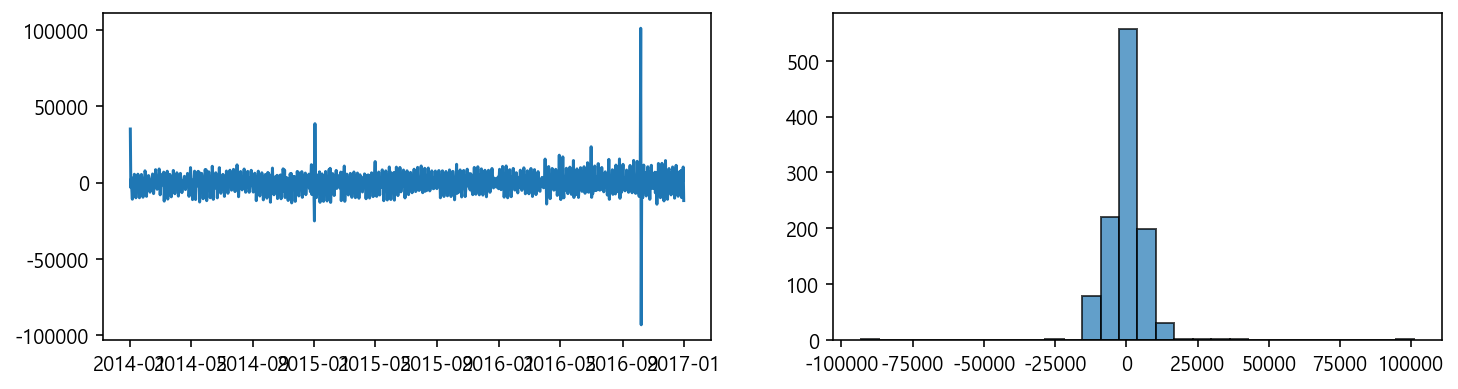

In [185]:
# 변화량
temp = df
temp['Qty_Diff'] = df['Qty'].diff() 

# 시각화
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.plot(temp['Date'], temp['Qty_Diff'])

plt.subplot(1, 2, 2)
plt.hist(temp['Qty_Diff'], bins=30, alpha=0.7, ec='k')
plt.show()

### **2) 요일별 변화량 비교**

- 요일별 판매량과 변화량을 막대그래프로 시각화해 비교합니다.
- 요일은 **df['Weekday'] = df['Date'].dt.weekday** 형태로 얻을 수 있습니다.
- Seaborn의 **sns.barplot()** 을 사용하면 자동 집계되어 시각화되니 편리합니다.

In [186]:
df

,Date,year,month,day,CustomerCount,Qty,year_month,Qty_Diff
0,2014-01-01,2014,1,1,1327,316,2014-01,NaN
1,2014-01-02,2014,1,2,90716,35336,2014-01,35020.0
2,2014-01-03,2014,1,3,84488,32032,2014-01,-3304.0
3,2014-01-04,2014,1,4,101361,34557,2014-01,2525.0
4,2014-01-05,2014,1,5,93475,29491,2014-01,-5066.0
...,...,...,...,...,...,...,...,...
1086,2016-12-27,2016,12,27,95643,27769,2016-12,-9918.0
1087,2016-12-28,2016,12,28,103717,30410,2016-12,2641.0
1088,2016-12-29,2016,12,29,102665,31304,2016-12,894.0
1089,2016-12-30,2016,12,30,127771,41450,2016-12,10146.0


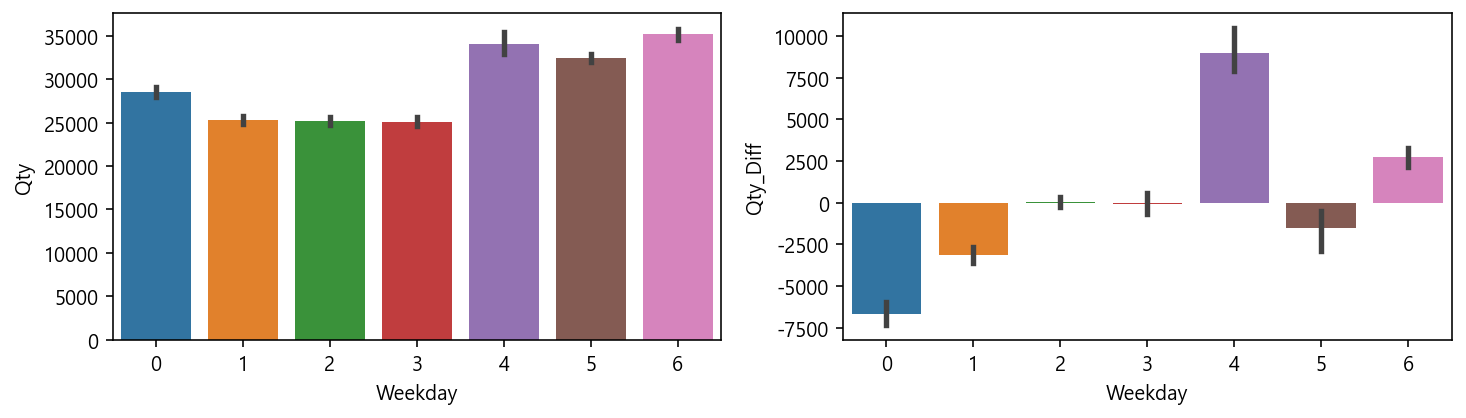

In [187]:
# 요일 추가
temp['Weekday'] = temp['Date'].dt.weekday

# 시각화
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
sns.barplot(x='Weekday', y='Qty', data=temp)

plt.subplot(1, 2, 2)
sns.barplot(x='Weekday', y='Qty_Diff', data=temp)
plt.show()

### **3) 시계열 데이터 분해**

- 다음과 같은 형태로 시계열 데이터를 분해할 수 있습니다.

~~~
decomp = sm.tsa.seasonal_decompose(temp['변수'], model='additive', period=7
~~~

- 분해 결과를 decomp 변수에 저장했으면 다음과 같이 데이터프레임을 만들어 시각화 할 수 있습니다.

~~~
result = pd.DataFrame({'observed':decomp.observed,
                       'trend':decomp.trend,
                       'seasonal':decomp.seasonal,
                       'residual':decomp.resid})
~~~

In [190]:
# 함수 만들기
def decomp_plot(Product_ID, sdate, edate, period):
    # 시계열 데이터 분해
    temp = sales.loc[(sales['Store_ID']==44) & (sales['Product_ID']==Product_ID) & (sales['Date'].between(sdate, edate))]
    temp.reset_index(drop=True, inplace=True)
    decomp = sm.tsa.seasonal_decompose(temp['Qty'], model='additive', period=period)

    # 시계열 분해 결과를 받아서 데이터프레임으로 저장
    result = pd.DataFrame({'observed':decomp.observed,
                           'trend':decomp.trend,
                           'seasonal':decomp.seasonal,
                           'residual':decomp.resid})

    # 4개의 그래프로 나눠서 그리기
    plt.figure(figsize=(12, 8))
    
    # observed
    plt.subplot(4, 1, 1)
    plt.plot(result['observed'])
    plt.setp(plt.gca().get_xticklabels(), visible=False) #! 위 그래프 x축 숨기기
    plt.title('Time Series Decomposition', size=15)
    plt.ylabel('observed')
    
    # trend
    plt.subplot(4, 1, 2)
    plt.plot(result['trend'])
    plt.setp(plt.gca().get_xticklabels(), visible=False)
    plt.ylabel('trend')
    
    # seasonal
    plt.subplot(4, 1, 3)
    plt.plot(result['seasonal'])
    plt.setp(plt.gca().get_xticklabels(), visible=False)
    plt.ylabel('seasonal')
    
    # residual
    plt.subplot(4,1,4)
    plt.plot(result['residual'])
    plt.ylabel('residual')
    plt.tight_layout()
    plt.show()
    
    return result


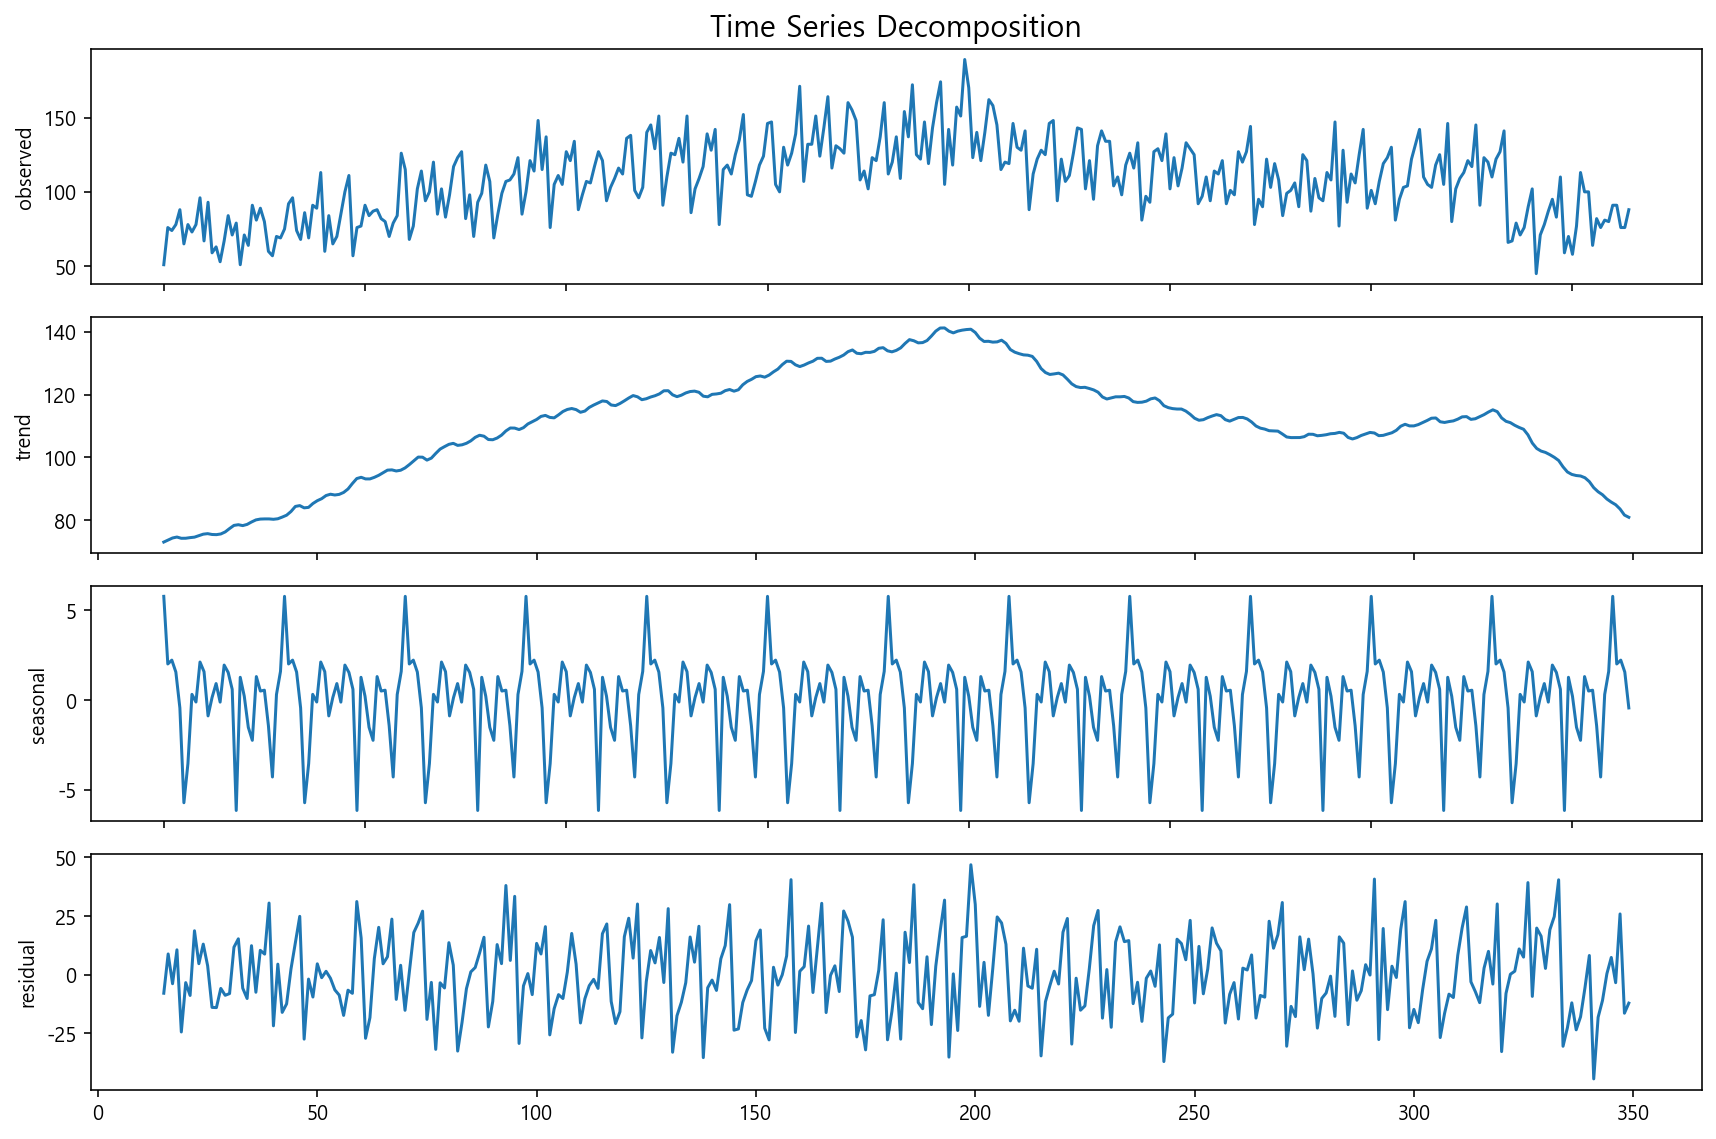

In [193]:
result=decomp_plot(42, '2014-01-01', '2014-12-31', 30)

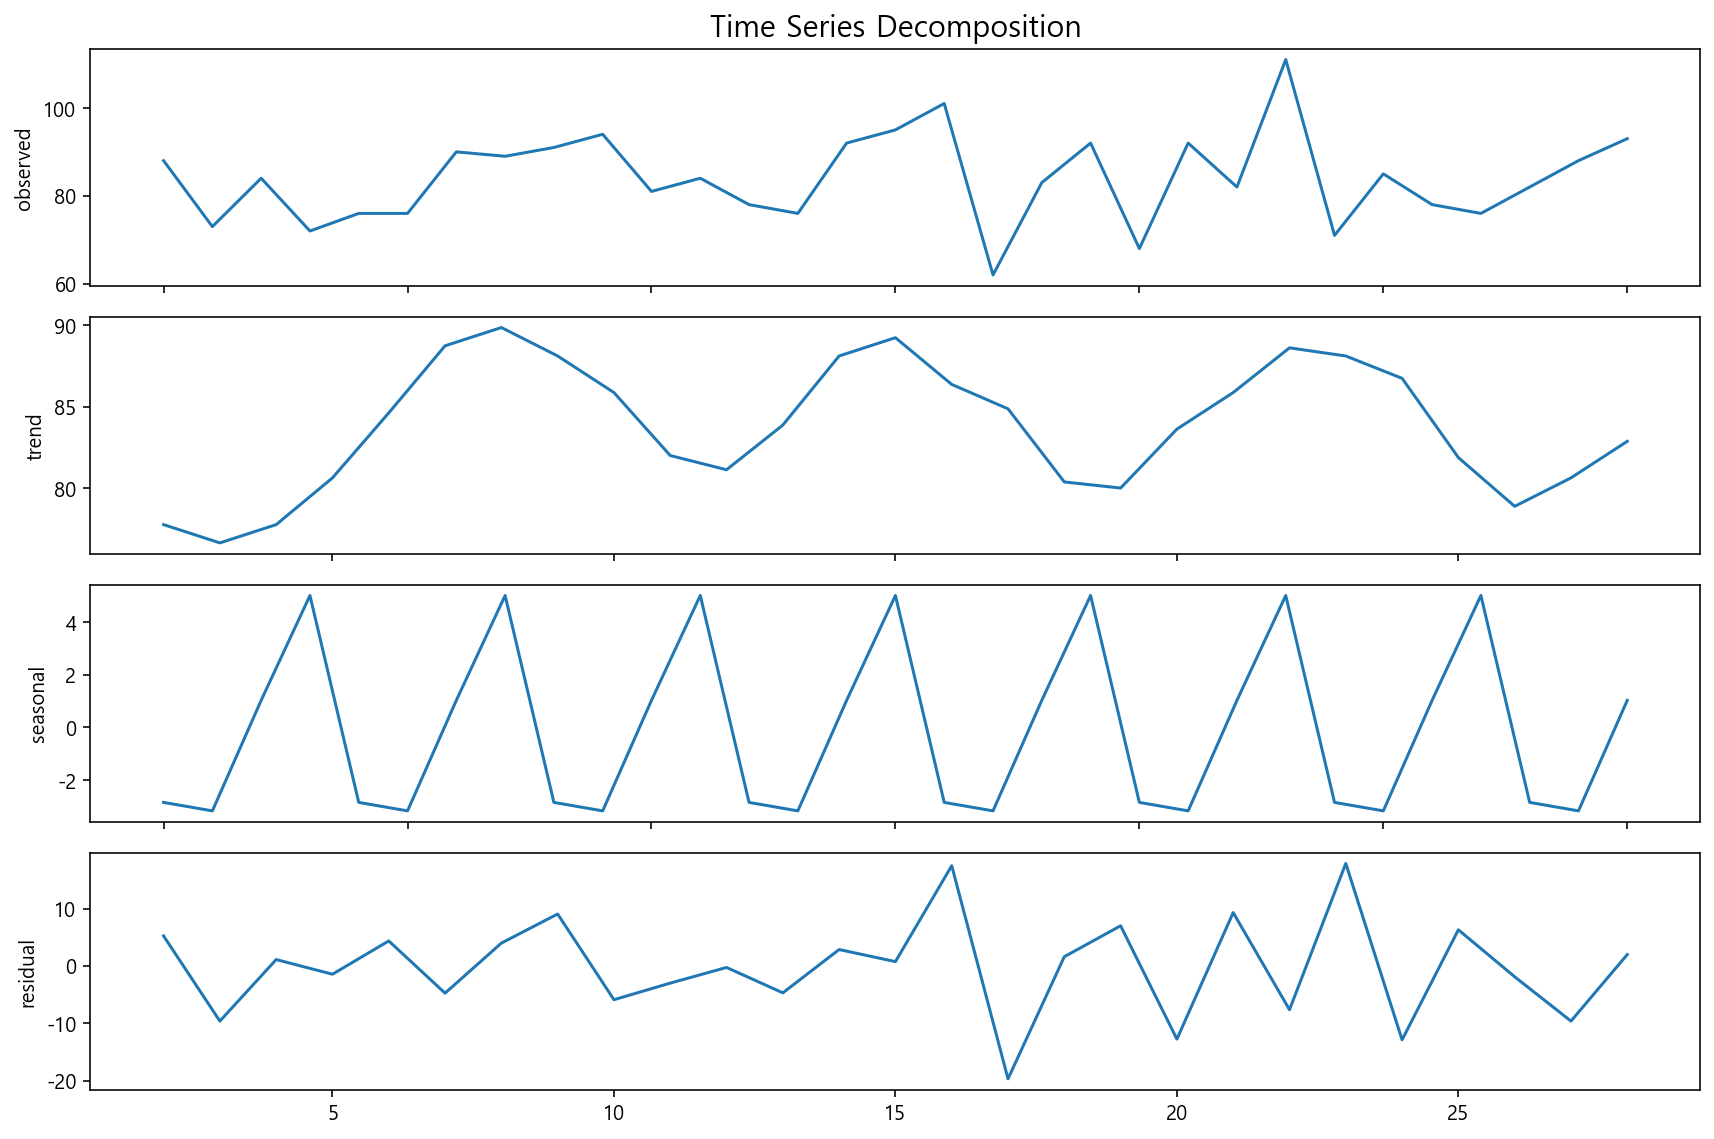

In [214]:
result=decomp_plot(42, '2016-01-01', '2016-01-31', 4)

### **4) 그 외 패턴 찾아보기**

In [198]:
# 모듈 불러오기
from statsmodels.graphics.tsaplots import plot_acf

# 함수 만들기
def auto_correlation(Product_ID, sdate, edate):
    temp = sales.loc[(sales['Store_ID']==44) & (sales['Product_ID']==Product_ID) & (sales['Date'].between(sdate, edate)), ['Qty']]
    fig, ax = plt.subplots(figsize=(12, 3))
    
    plot_acf(temp['Qty'], lags=50, alpha=0.05, ax=ax)
    plt.show()

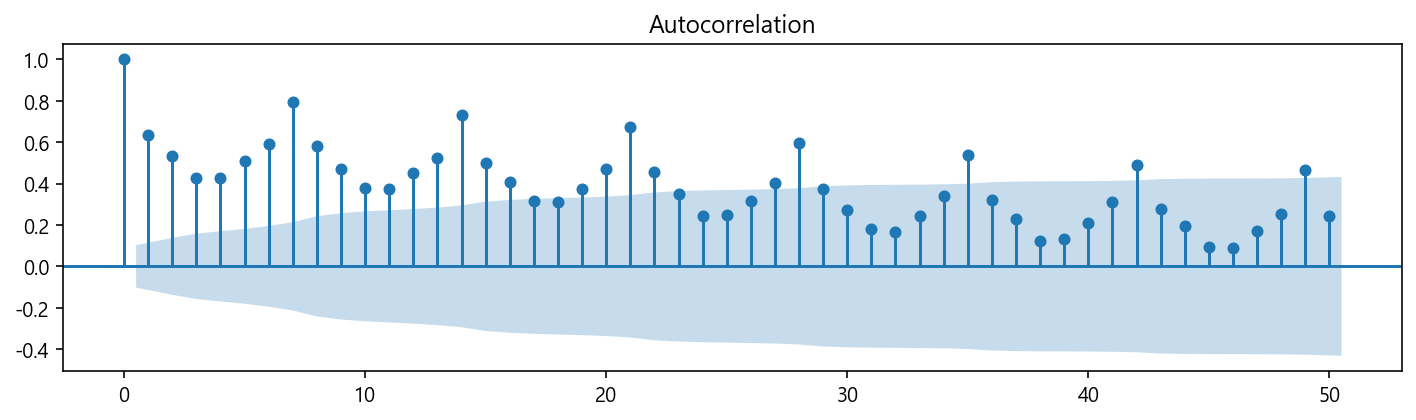

In [199]:
# 42번 상품
auto_correlation(42, '2016-01-01', '2016-12-31')

In [197]:
# 가계별 판매량

# # 가게가 1개임
# # 연도와 월을 추출
# sales_grocery['year'] = sales_grocery['Date'].dt.year
# sales_grocery['month'] = sales_grocery['Date'].dt.month

# # 2014년부터 2016년까지의 데이터 선택
# sales_2014_2016 = sales_grocery[(sales_grocery['year'] >= 2014) & (sales_grocery['year'] <= 2016)]

# # 연도와 월을 기준으로 그룹화하고 판매량 합계 계산
# monthly_sales_2014_2016 = sales_2014_2016.groupby(['year', 'month','Store_ID'])['Qty'].sum()
# monthly_sales_2014_2016 = monthly_sales_2014_2016.astype(int)

# # 결과 출력
# display(monthly_sales_2014_2016)




# # 데이터 프레임 생성
# df = monthly_sales_2014_2016.reset_index()

# # 연도와 월을 조합하여 새로운 'year_month' 열 생성
# df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

# # 선형 그래프 생성
# plt.figure(figsize=(12, 6))
# sns.lineplot(x='year_month', y='Qty', data=df, hue='Store_ID', marker='o')
# plt.xticks(rotation=45)  # x축의 텍스트 회전
# plt.title("2014-2016 월별 판매량")
# plt.xlabel("월")
# plt.ylabel("판매량")
# plt.tight_layout()
# plt.show()


## **(5) 패턴 정리하기**

* 다양한 탐색을 통해 찾은 시계열 패턴을 적어보세요.

In [ ]:
가설)
1) 곡물 판매량은 계절별로 변화가 있을것이다
2) 유가 증감과 곡물 판매량간 연관이 있을것이다
3) 월별 방문 고객수와  판매량 사이에 관련성이 있을것이다
4) 월~목 / 금토일 변수가 판매량 영향줄것이다
